# En este proyecto se hace una comparación entre espectros Raman obtenidos experimentalmente y sus equivalentes espectros obtenidos mediante una simulación con el software Gaussian.

## Inicialmente se desconocía el origen de los espectros experimentales, por lo que la comparación con los de las simulaciones permitió identificar la sustancia que produjo cada uno.

In [1]:
# !jt -t onedork -nfs 11 -kl -cursw 2 -cursc r -cellw 95% -T

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown as md
from IPython.display import display, Math # Formato LaTeX en print


from jupyterthemes import jtplot
jtplot.style(theme='grade3', context = 'talk', ticks = True, grid = False, fscale = 2.5)

#colores para graficar
rosa = '#f21d64'
azul = '#1d7bde'
rojo = '#f53827'
morado = '#9b35e8'

# LaTeX
# plt.rcParams['text.usetex'] = True
# plt.rc('text', usetex=True)
plt.rc('lines', lw=3)

# LaTeX
# plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rc('lines', lw=3)
color_text = 'black'
fontsize = 30
plt.rcParams.update({'text.usetex' : True, 'font.family' : 'serif', 'font.weight' : 'bold',
                     'text.color' : color_text, 'axes.labelcolor' : color_text, 
                     'xtick.color' : color_text, 'ytick.color' : color_text,
                     'figure.dpi' : 300, 'savefig.format' : 'jpg', 'savefig.bbox' : 'tight',
                     'axes.titlesize' : 32, 'font.size' : fontsize
                    })

In [3]:
def graph_espectro_teo(espectro, save, title):
    fig, ax = plt.subplots()
    ax.plot(espectro['x'], espectro['y'], color = azul, label = r'\textit{Espectro Simulación}')
    ax.set_xlabel(r'{\textit{Corrimiento Raman ($cm^{-1}$)}}')
    ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
    ax.set_xlim(espectro['x'].min(),espectro['x'].max())
    ax.set_title(title)
    ax.legend()
#     ax.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
    fig.tight_layout()
    plt.savefig(save)

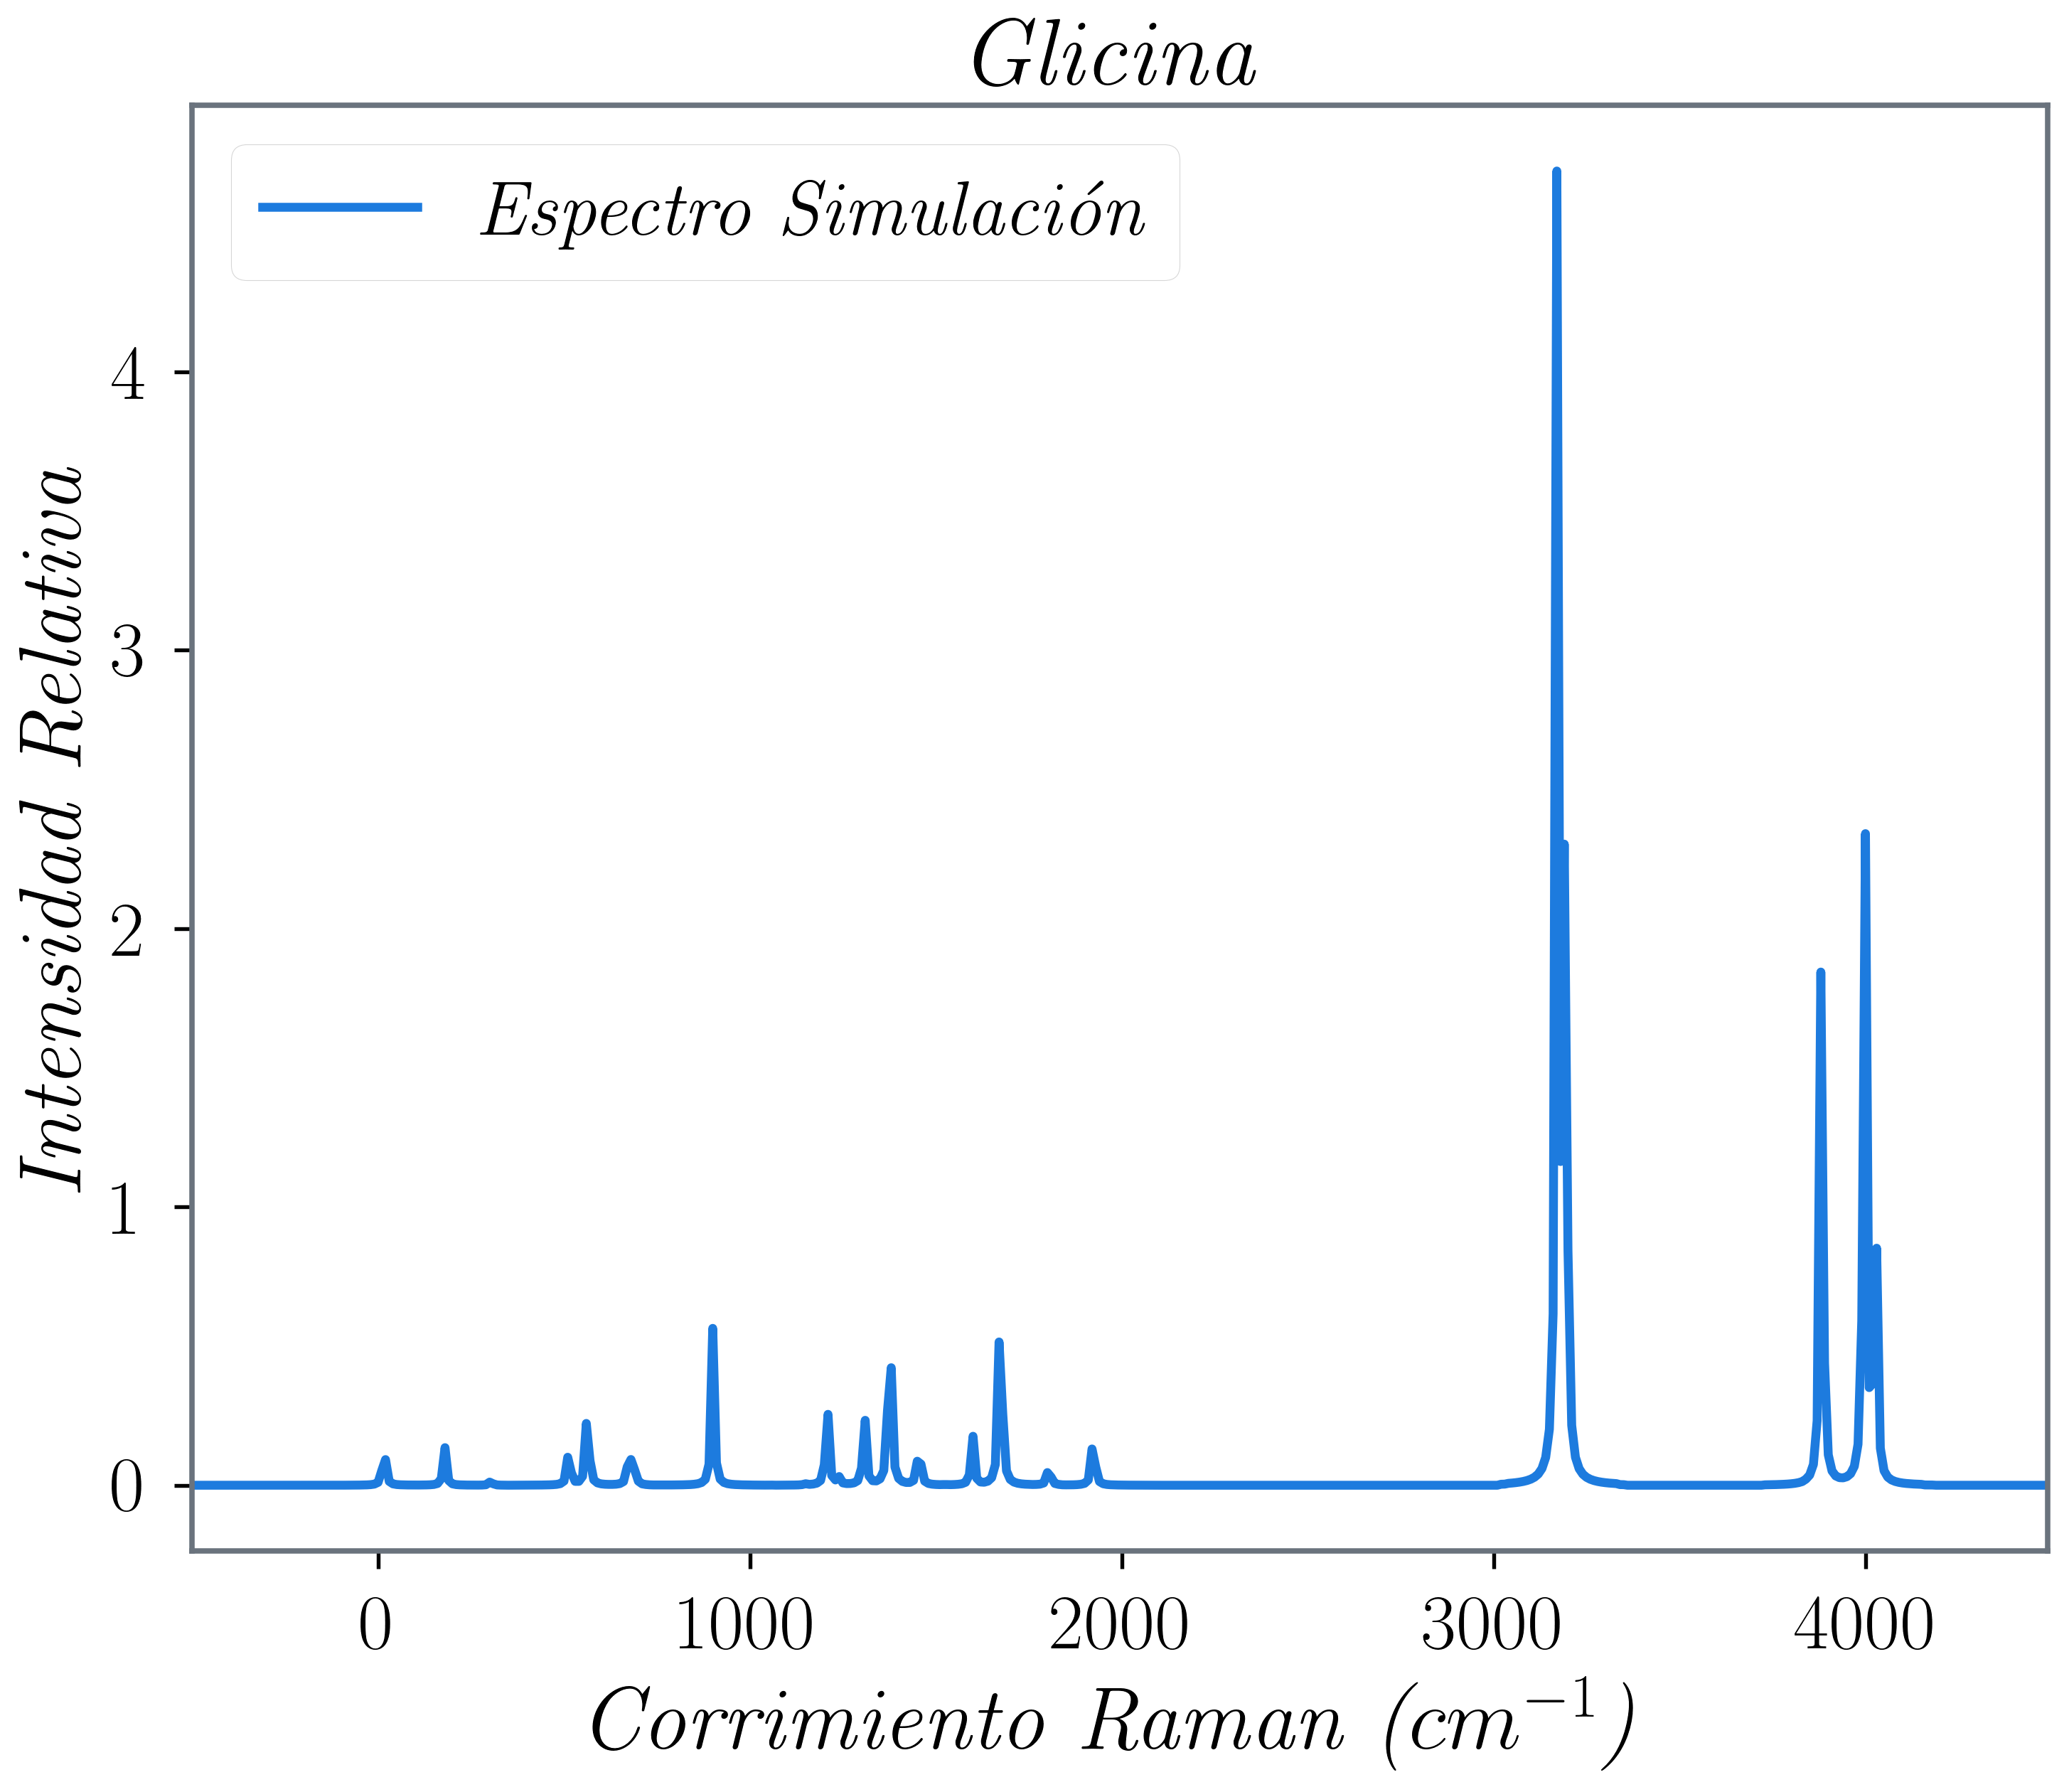

In [4]:
glicina_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/glicina.txt',
                skipinitialspace=True,
                skiprows=32,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])
graph_espectro_teo(glicina_teo, 'glicina_teo.jpg', r'\textit{Glicina}')

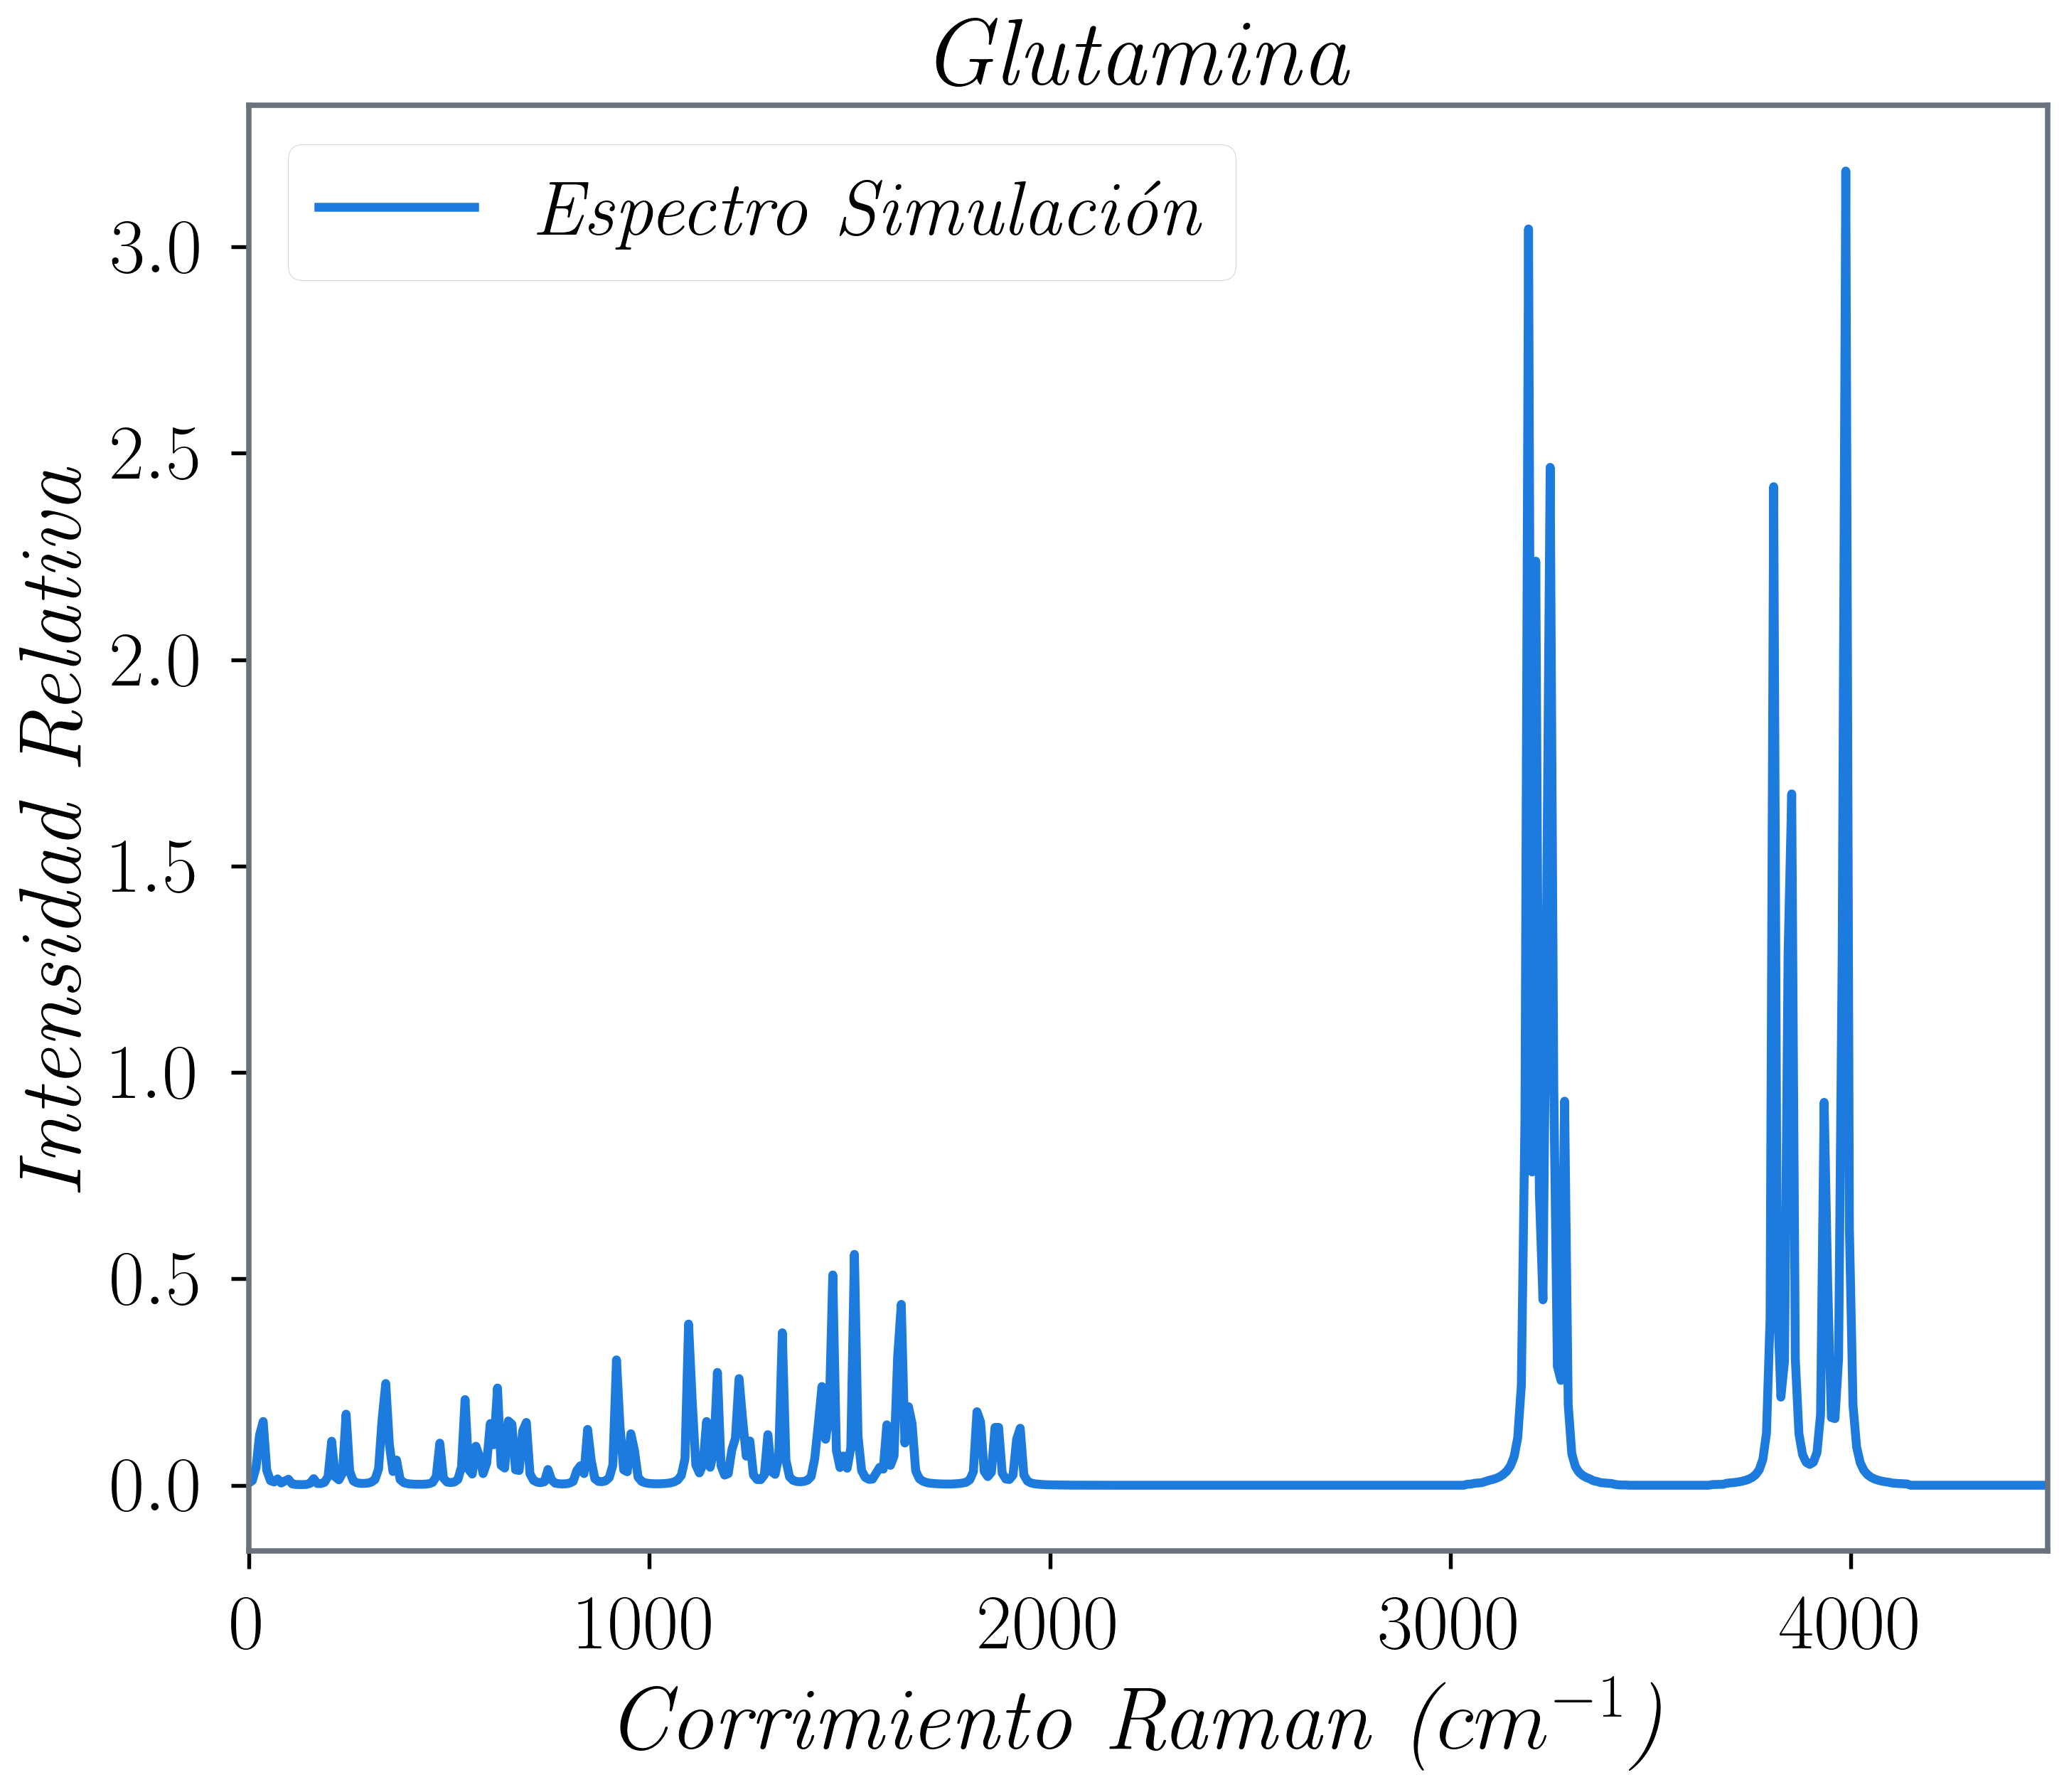

In [5]:
glutamina_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/L_glutamina.txt',
                skipinitialspace=True,
                skiprows=63,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])
graph_espectro_teo(glutamina_teo, 'glutamina_teo.jpg', r'\textit{Glutamina}')

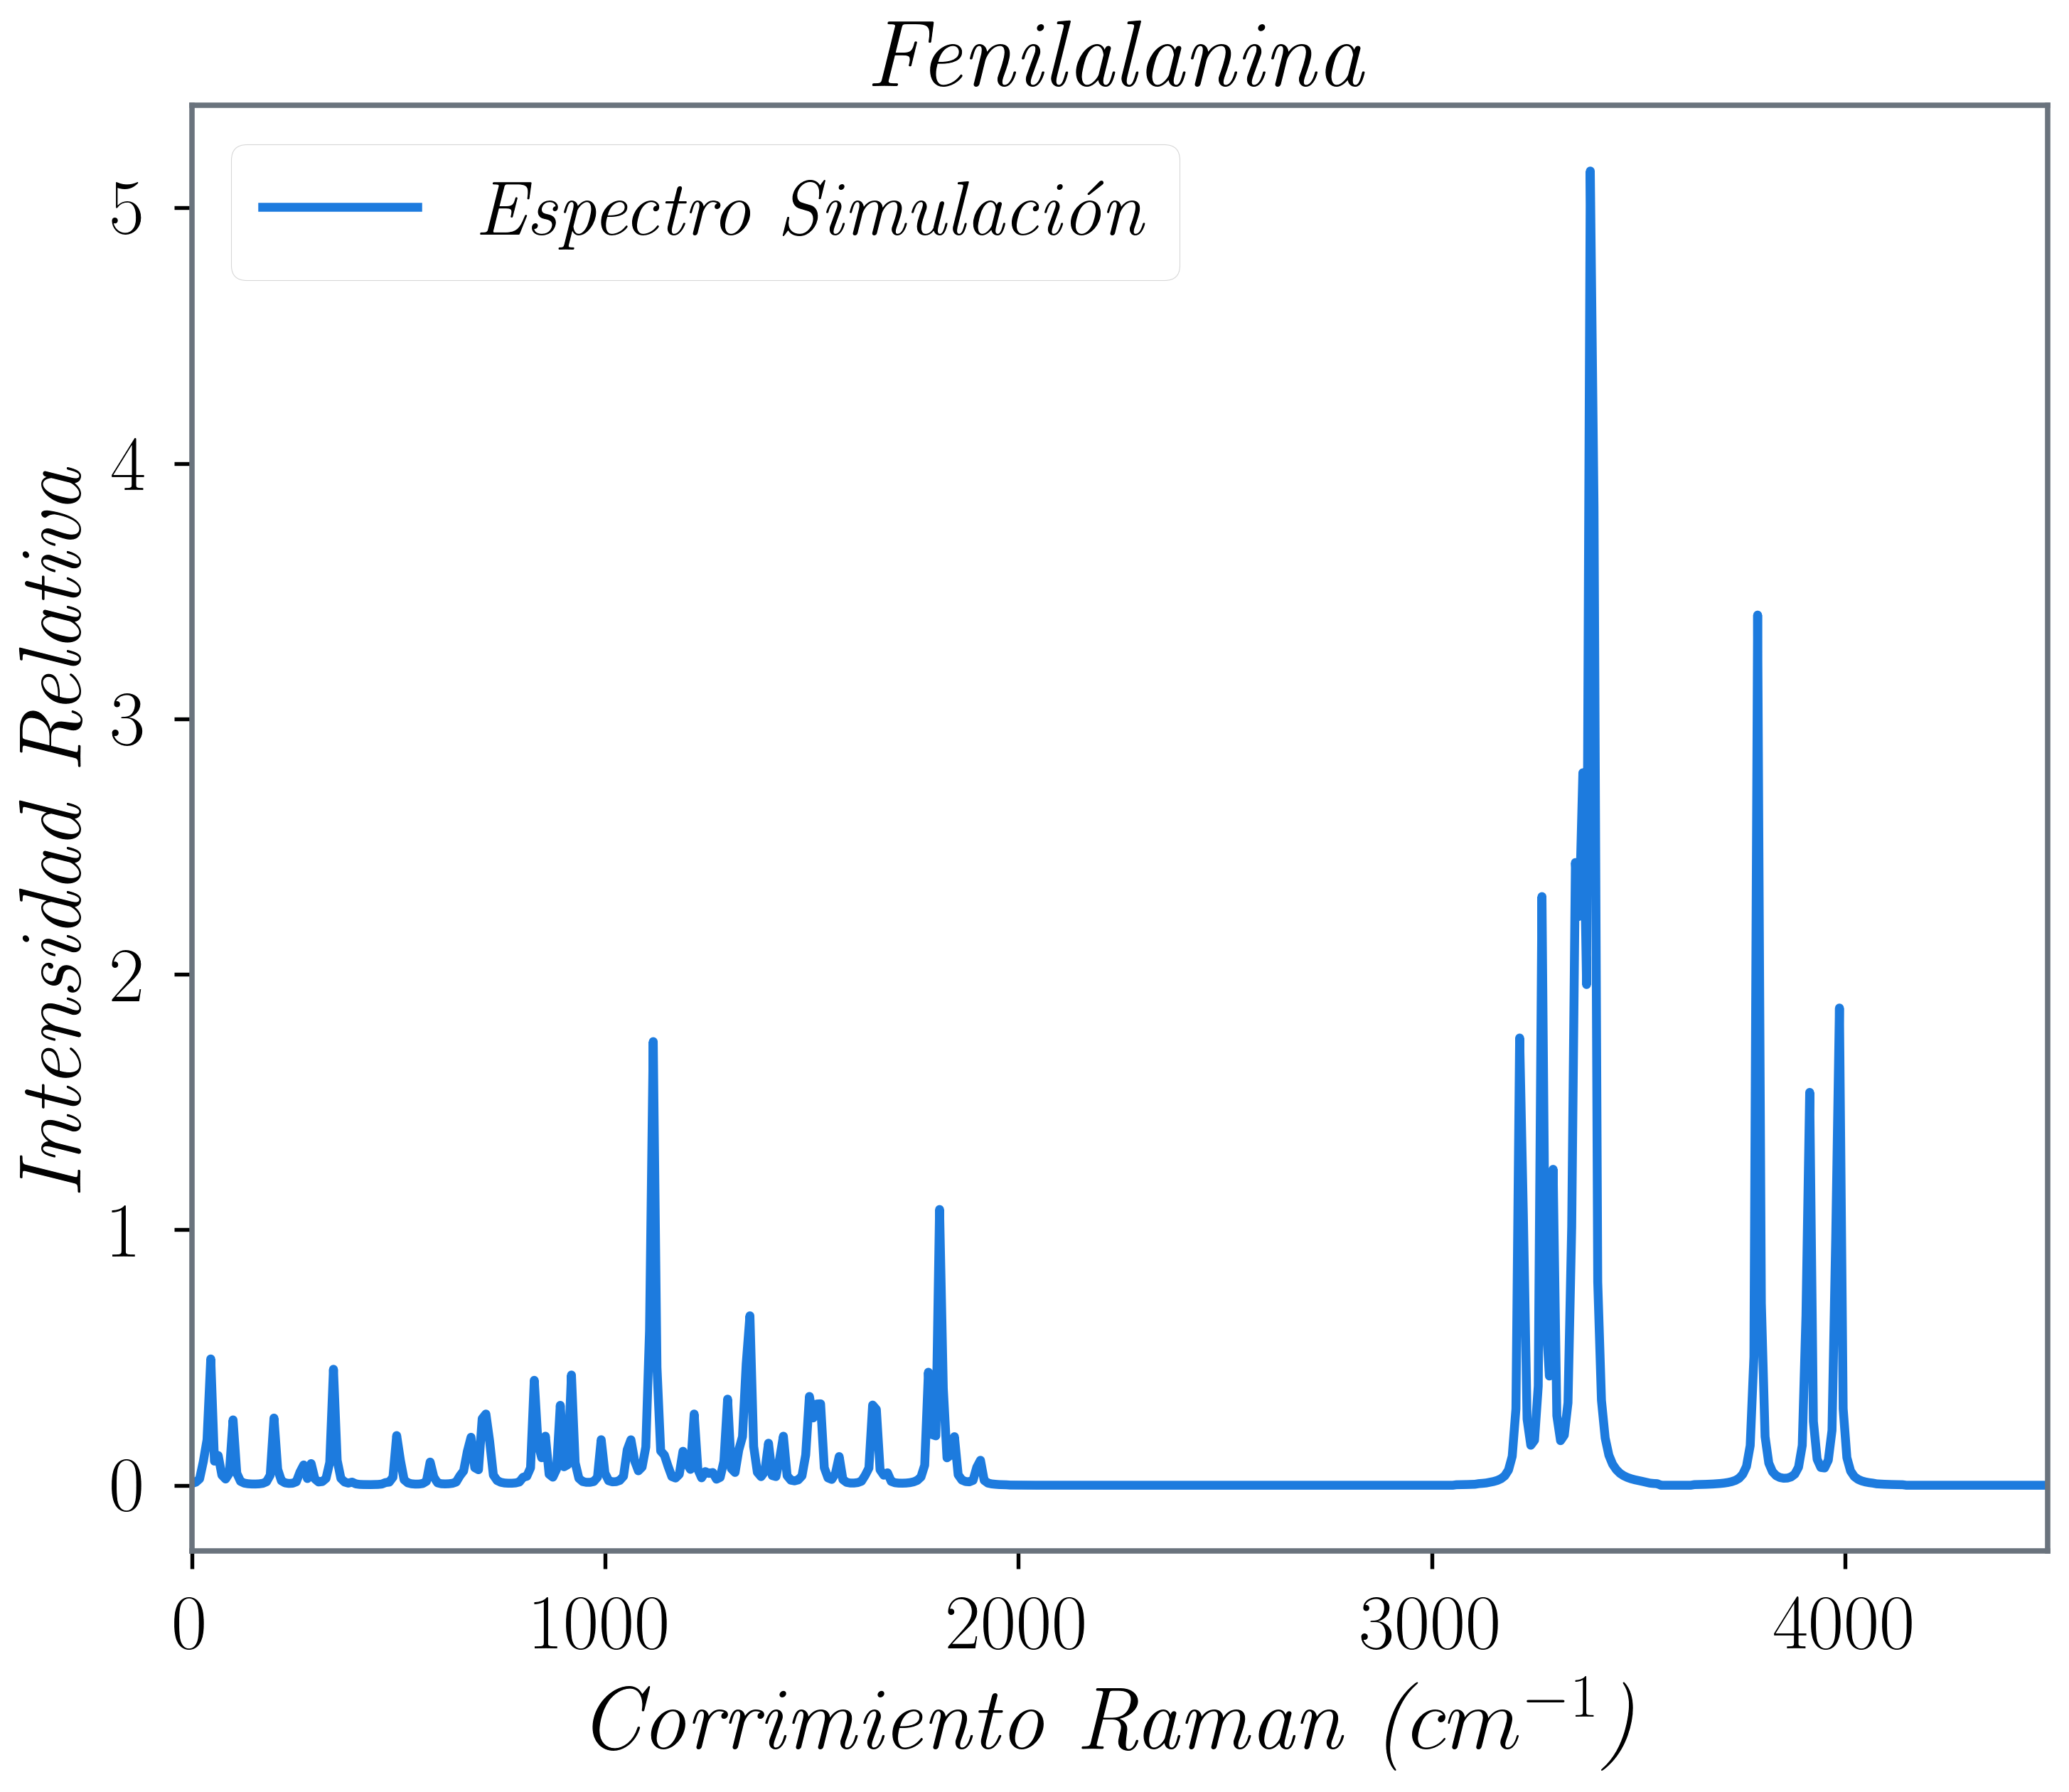

In [6]:
raman_feni_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/L_fenilalanina.txt',
                skipinitialspace=True,
                skiprows=72,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])
graph_espectro_teo(raman_feni_teo, 'fenilalanina_teo.jpg',r'\textit{Fenilalanina}')

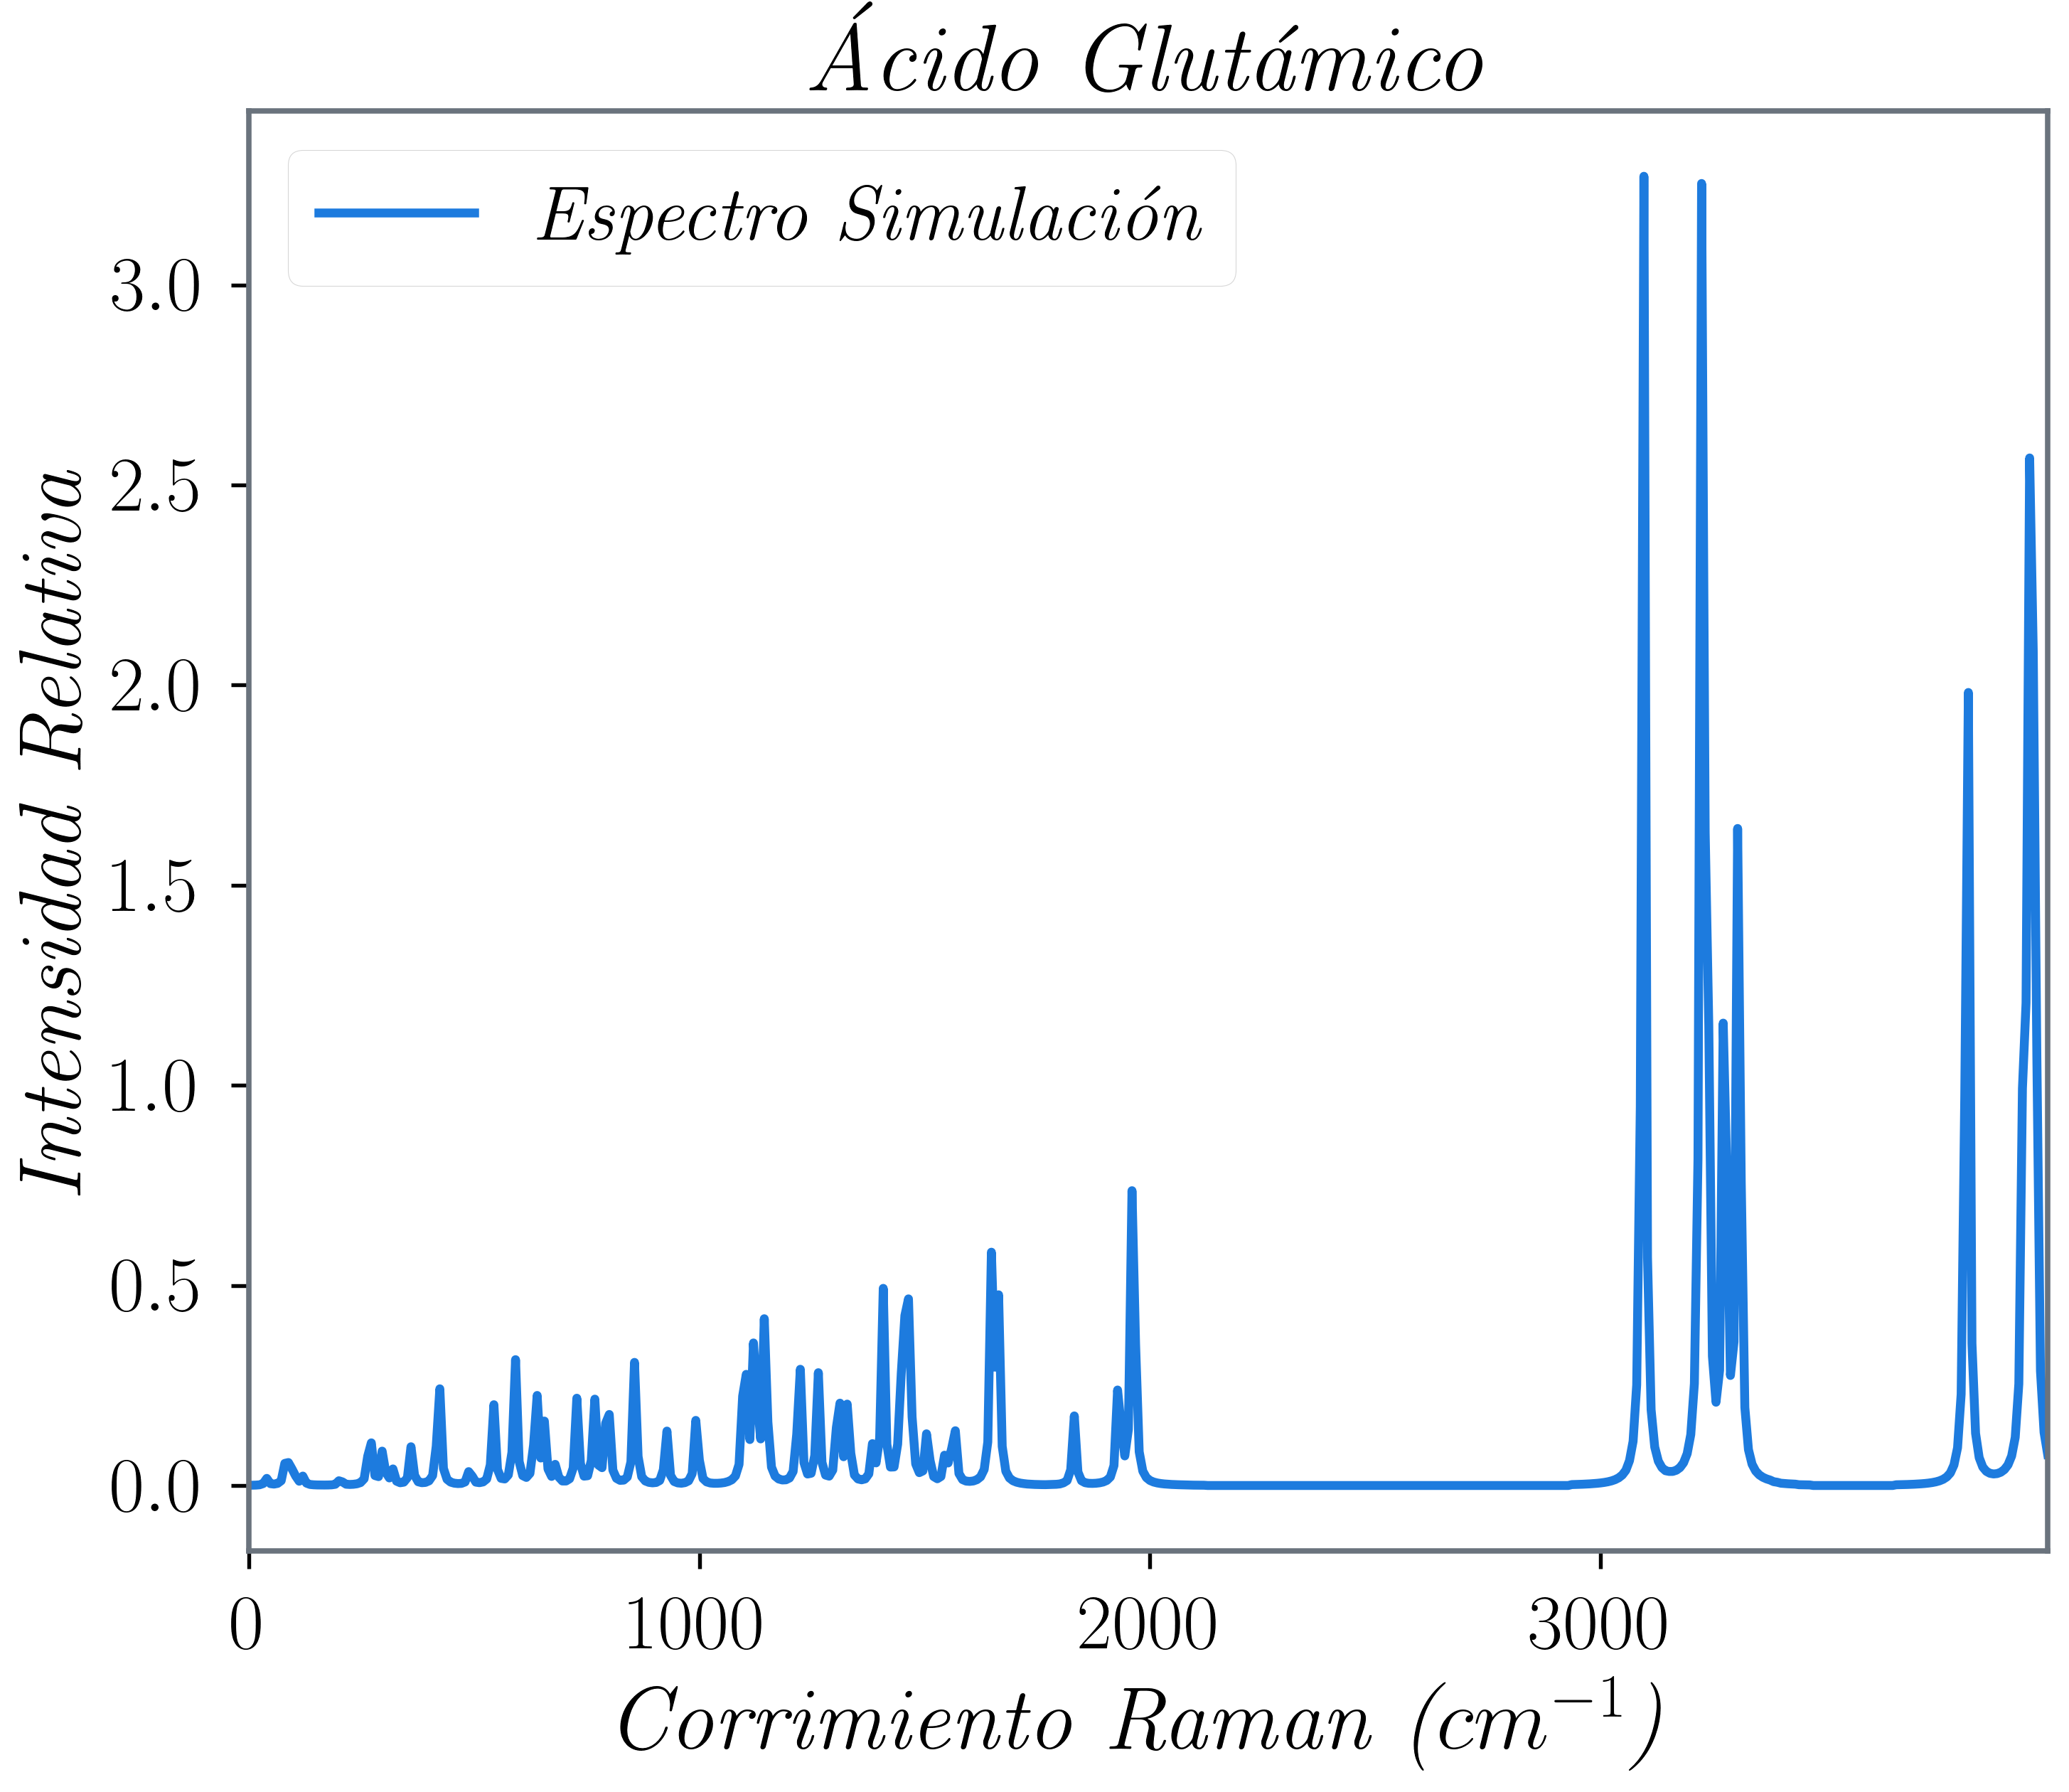

In [7]:
acido_glutam_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/L_glutam_acido.txt',
                skipinitialspace=True,
                skiprows=60,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])
graph_espectro_teo(acido_glutam_teo, 'glutam_acido_teo.jpg', r'\textit{Ácido Glutámico}')

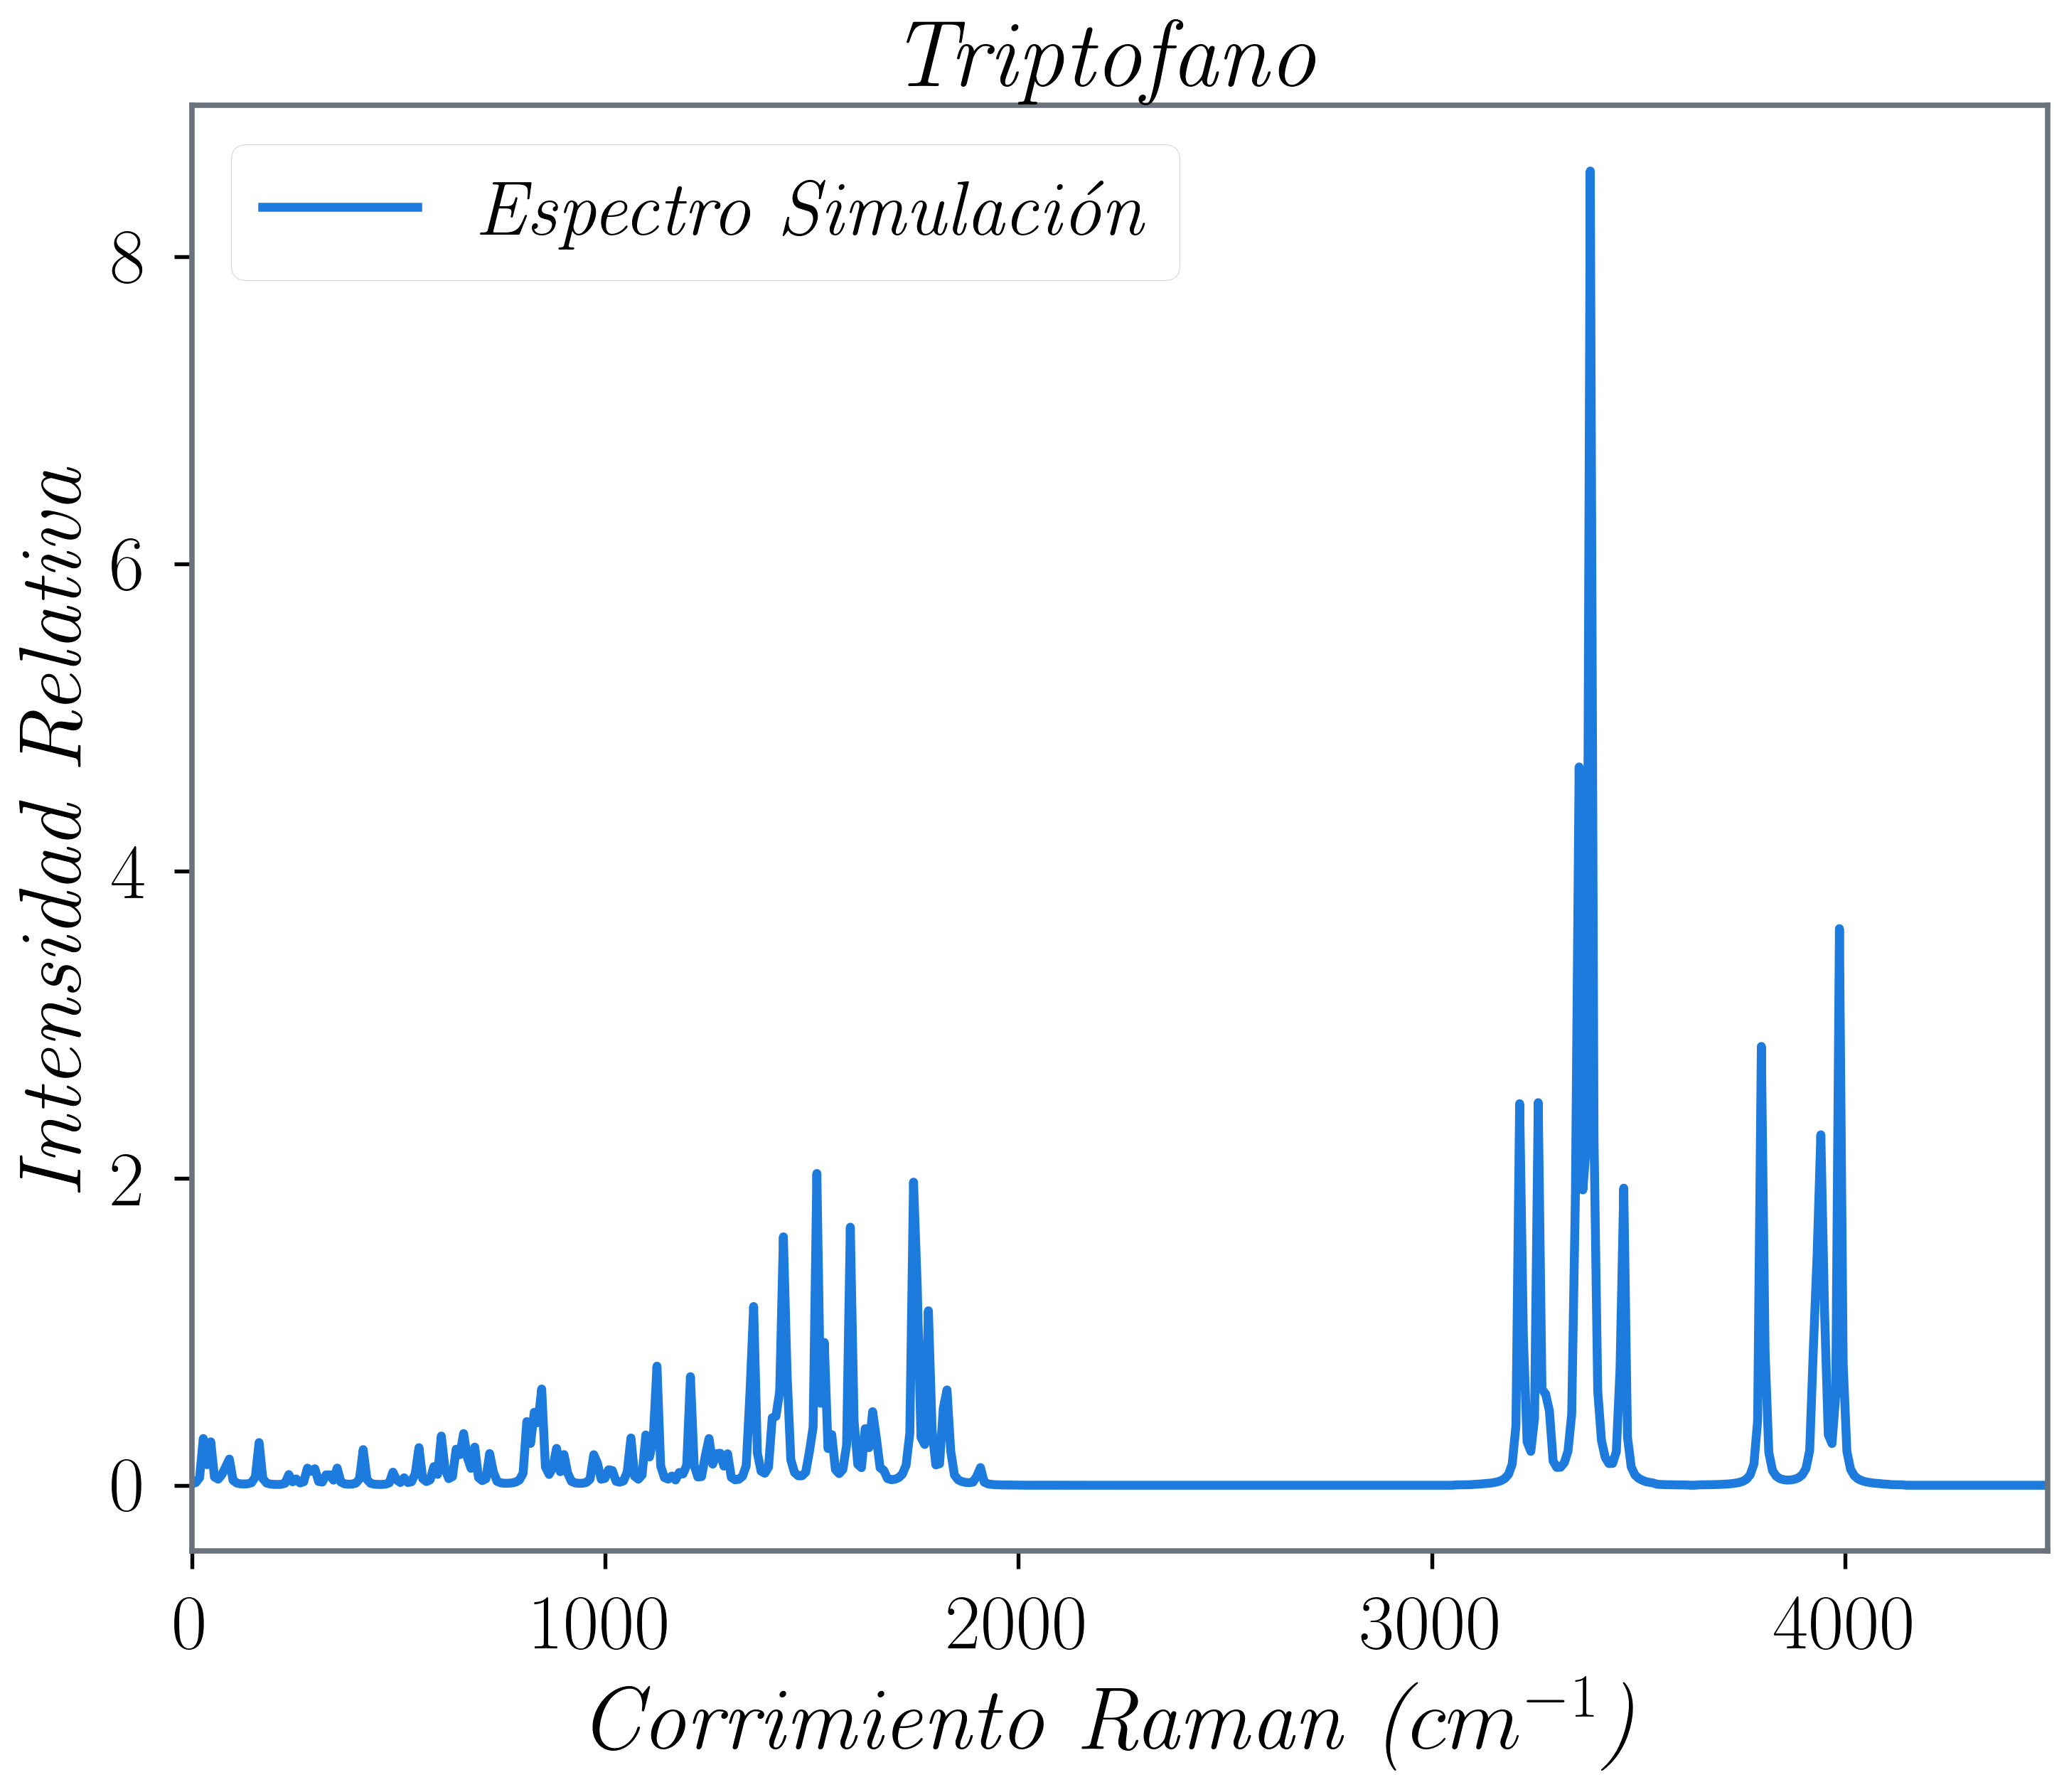

In [8]:
triptofano_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/triptofano.txt',
                skipinitialspace=True,
                skiprows=84,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])
graph_espectro_teo(triptofano_teo, 'triptofano_teo.jpg', r'\textit{Triptofano}')

In [9]:
import glob
files = glob.glob('espectros_experimentales/*.csv')
dfs = {file: pd.read_csv('{}'.format(file), header = 0, names=['x','y']) for file in files}

In [10]:
def espectrum_plot(df, file_name = ''):
    fig, axs = plt.subplots()
    axs.plot(df['x'],df['y'], color = rosa)
    axs.set_xlabel(r'{\textit{Posición (pixeles)}}')
    axs.set_ylabel(r'{\textit{Intensidad Relativa}}')
    axs.set_title( r'\textit{{File}}: {file_name}'.format(file_name = file_name[6:]) )
    
    axs.set_xlim(df['x'].min(), df['x'].max())
    axs.set_ylim(0,df['y'].max() + df['y'].max()*0.05)
    fig.tight_layout()
    
#     plt.savefig('graficas/{file_name}.png'.format(file_name=file_name[6:-4]))
    return fig

In [11]:
# files_plots = []
# for file in files: 
#     fig = espectrum_plot(dfs[file], file_name = file)
#     files_plots.append(fig)

# dfs['plot'] = files_plots

In [12]:
#Defino función para integrar usando la regla de simpson
def integra(df):
    a = df['x'].min()
    b = df['x'].max()
    n = len(df['x'])
    
    h = (b-a)/n
    s_par = 0. ; s_impar = 0.
    for i in range(1,n):
        x = df['x'][i]
        if i%2 == 0:
            s_par = s_par + df['y'][i]
        else:
            s_impar = s_impar + df['y'][i]
    
    return (h/3)*(df[df['x']==a]['y'].unique() + 2*s_par + 4*s_impar + df[df['x']==b]['y'].unique())  

In [13]:
silicio = pd.DataFrame.from_dict( {'valores': pd.read_csv('espectros_experimentales/MYN9304.csv', header = 0, names=['x','y'])}['valores'] )
y_max = silicio[(silicio['x']>400) & (silicio['x']<600)]['y'].max()
x_max_exp = silicio[silicio['y'] == y_max]['x'].unique()[0]
x_max_real = 520.5
ϕ = x_max_real - x_max_exp
ϕ

11.172799999999995

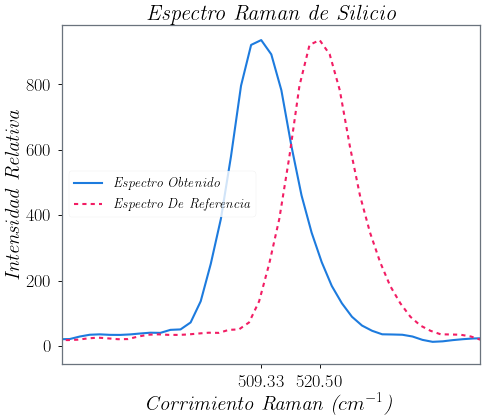

In [14]:
dpi = 50
y_max = silicio[(silicio['x']>400) & (silicio['x']<600)]['y'].max()
x_max_exp = silicio[silicio['y'] == y_max]['x'].unique()[0]
x_max_real = 520.5
ϕ = x_max_real - x_max_exp

fig, ax = plt.subplots(dpi=dpi)
ax.plot(silicio['x'], silicio['y'], color = azul, label = r'\textit{Espectro Obtenido}')
ax.plot(silicio['x'] + ϕ, silicio['y'], color = rosa , label = r'\textit{Espectro De Referencia}', dashes = [2,2])
ax.set_xlabel(r'{\textit{Corrimiento Raman ($cm^{-1}$)}}')
ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
ax.set_xlim(silicio['x'].min(),silicio['x'].max())
ax.set_title(r'\textit{Espectro Raman de Silicio}')
ax.set_xlim(460+ϕ,540+ϕ)
ax.set_xticks([x_max_exp, x_max_real])
ax.legend(fontsize = 20, loc = 6)
fig.tight_layout()
plt.savefig('silicio.jpg')

In [15]:
def espectro(espectro, save, title):
    fig, ax = plt.subplots(dpi=dpi)
    for file in espectro:
        df = pd.DataFrame.from_dict(dfs[file])
        c = 1/integra(df)
        ax.plot(df['x'] + ϕ, c*df['y'], color = rosa, alpha = 1/len(espectro)+0.05)
    
    ax.plot(df['x'] + ϕ, c*df['y'], color = rosa, alpha = 0.6, label = r'\textit{Espectros Experimentales}')
    ax.set_xlabel(r'{\textit{Corrimiento Raman ($cm^{-1}$)}}')
    ax.set_ylabel(r'{\textit{Intensidad Relativa Normalizada}}')
    ax.set_xlim(df['x'].min()-df['x'].min()*0.2,df['x'].max() + df['x'].max()*0.01)
    ax.set_title(title)
    ax.legend()
    ax.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
    fig.tight_layout()
    plt.savefig(save)

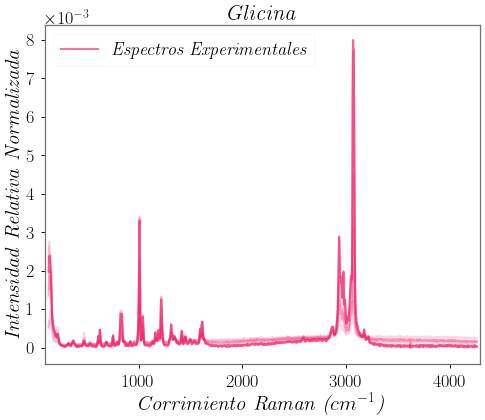

In [16]:
#Espectro 1
glicina_exp = files[0:8] 
espectro(glicina_exp, 'glicina_exp.png', r'\textit{Glicina}')

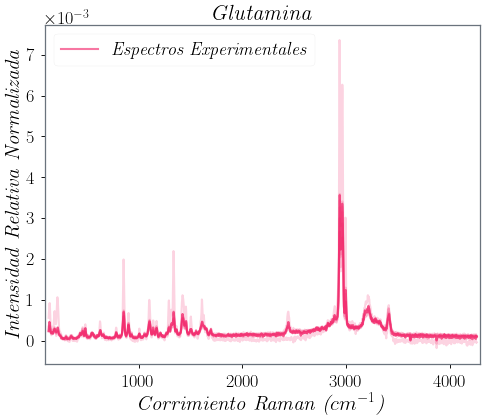

In [17]:
#Espectro 2
glutamina_exp = files[8:15]
espectro(glutamina_exp, 'glutamina_exp.png', r'\textit{Glutamina}')

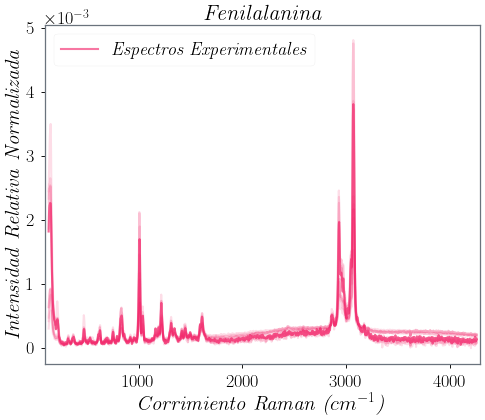

In [18]:
#Espectro 3
fenilalanina_exp = [
    'espectros_experimentales\\MYN9299.CSV', 'espectros_experimentales\\MYN9300.CSV', 'espectros_experimentales\\MYN9301.CSV',
    'espectros_experimentales\\MYN9305.CSV', 'espectros_experimentales\\MYN9305.CSV', 'espectros_experimentales\\MYN9306.CSV',
    'espectros_experimentales\\MYN9307.CSV', 'espectros_experimentales\\MYN9308.CSV', 'espectros_experimentales\\MYN9309.CSV',
    'espectros_experimentales\\MYN9310.CSV' 
] #+ ['espectros_experimentales\\MYN9303.CSV', 'espectros_experimentales\\MYN9304.CSV', 'espectros_experimentales\\MYN9311.CSV']

espectro(fenilalanina_exp, 'fenilalanina_exp.jpg', r'\textit{Fenilalanina}')

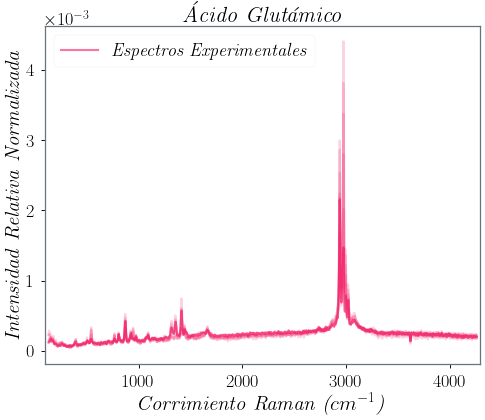

In [19]:
#Espectro 4
acido_glutam_exp = files[27:27+7]
espectro(acido_glutam_exp, 'acido_glutam_exp.png', r'\textit{Ácido Glutámico}')







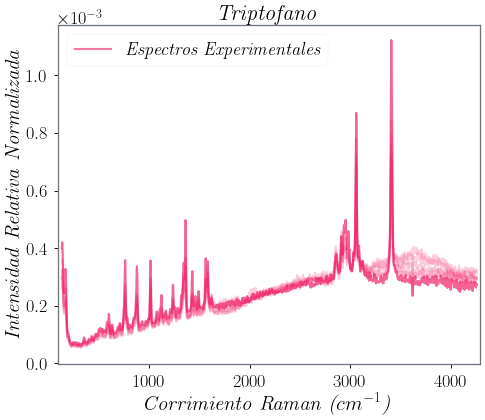

In [20]:
#Espectro 5
triptofano_exp = [
    'espectros_experimentales\\MYN9320.CSV', 'espectros_experimentales\\MYN9321.CSV', 'espectros_experimentales\\MYN9322.CSV',
    'espectros_experimentales\\MYN9323.CSV', 'espectros_experimentales\\MYN9324.CSV', 'espectros_experimentales\\MYN9325.CSV'
]# + ['espectros_experimentales\\MYN9326.CSV', 'espectros_experimentales\\MYN9327.CSV', 'espectros_experimentales\\MYN9328.CSV'
  #   ]# + ['espectros_experimentales\\MYN9319.CSV']

espectro(triptofano_exp, 'triptofano_exp.png', r'\textit{Triptofano}')

In [21]:
def espectro_teo_exp(espectro_exp,
                     espectro_teo,
                     f1=1,
                     f2=1,
                     c2 = 1,
                     save = 'newfig.jpg',
                     transparencia=True,
                     divide=False,
                     α = 1,
                     escala = 0.0001,
                     lims1=(0, 1),
                     lims2=(1, 2),
                     xlabel_coords = (0.4, 0.04),
                     x2label_coords = (0.43, 0.95),
                     title_coords = (0.48,1.),
                     title = ' ',
                     modos = [],
                     fontsize = 29
                    ):
    if divide == False:
        fig, ax = plt.subplots(figsize = fig_size, dpi=dpi)
        for file in espectro_exp:
            df = pd.DataFrame.from_dict(dfs[file])
            c = 1 / integra(df)
            if transparencia == True:
                ax.plot(df['x'] + ϕ,
                        c * df['y'],
                        color=rosa,
                        alpha=1 / len(espectro_exp) + 0.05)
            else:
                ax.plot(df['x'] + ϕ, c * df['y'], color=rosa)
        ax.plot(f1_correcion * espectro_teo['x'], (1 / integra(espectro_teo)) * espectro_teo['y'])

    elif divide == True:
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, dpi=dpi)
        ####Primer mitad
        for file in espectro_exp:
            df = pd.DataFrame.from_dict(dfs[file])
            c = 1 / integra(df)
            if transparencia == True:
                ax1.plot(df['x'] + ϕ,  c2 *c * df['y'], color=rosa,alpha=1/len(espectro_exp) + 0.05 , label =  title + '\n' +  r'\textit{Experimental}' )
            else:
                ax1.plot(df['x'] + ϕ, c2 * c * df['y'], color=rosa, label = title + '\n' + r'\textit{Experimental}')        
        ax1.plot(f1 * espectro_teo['x'], (1 / integra(espectro_teo)) * espectro_teo['y'], alpha=α, label = r'\textit{Teórico}')
        ax1.set_xlim(lims1[0], lims1[1])
        ####Segunda mitad
        for file in espectro_exp:
            df = pd.DataFrame.from_dict(dfs[file])
            c = 1 / integra(df)
            if transparencia == True:
                ax2.plot(df['x'] + ϕ, c2 * c * df['y'], color=rosa,alpha=1/len(espectro_exp) + 0.05)
            else:
                ax2.plot(df['x'] + ϕ, c2 * c * df['y'], color=rosa)
        ax2.plot(f2 * espectro_teo['x'],(0.6)*(1 / integra(espectro_teo)) * espectro_teo['y'], alpha = α)
        ax2.set_xlim(lims2[0], lims2[1])

        
        ax1.set_ylabel(r'{\textit{Intensidad Relativa Normalizada}}')
        ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
        ax1.legend(loc = 2, fontsize = fontsize - 3)

        ax1.spines['right'].set_visible(False)
        ax2.spines['left'].set_visible(False)
        ax1.xaxis.tick_bottom()
        ax2.tick_params(labelright=False)
        ax2.yaxis.tick_right()
        
        d = .5  # proportion of vertical to horizontal extent of the slanted line
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, 
                      linestyle="none", color='black', mec='black', mew=1, clip_on=False)
        ax1.plot([1, 1], [1, 0], transform=ax1.transAxes, **kwargs)
        ax2.plot([0, 0], [0, 1], transform=ax2.transAxes, **kwargs)
        plt.subplots_adjust(hspace = 0.02)
        ax2.set_ylim( (espectro_teo['y'].min() - (espectro_teo['y'].max()*0.001))*escala , 
                      (espectro_teo['y'].max() + (espectro_teo['y'].max()*1)) * escala )
        ax1.xaxis.set_label_coords(1., -0.1)
        ax1.set_xlabel('asdf ', color = 'w')
        
        
        
        
        ######## Set axis
        fig.text(xlabel_coords[0], xlabel_coords[1], r'\textit{Modos Normales}', fontsize = fontsize) 
        fig.text(title_coords[0], title_coords[1], title, fontsize = fontsize, color ='w') 
        
        ax1.set_xticks(modos[modos['Scaled Freq'] < lims1[1]]['Scaled Freq'])
        ax1.set_xticklabels(modos[modos['Scaled Freq'] < lims1[1]]['Modes'], fontweight='heavy')
        ax2.set_xticks(modos[modos['Scaled Freq'] > lims1[1]]['Scaled Freq'])
        ax2.set_xticklabels(modos[modos['Scaled Freq'] > lims1[1]]['Modes'])
        
        secax1 = ax1.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
        secax2 = ax2.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
        secax1.set_xlabel('asdf', color = 'w')
        fig.text(x2label_coords[0], x2label_coords[1], r'\textit{Corrimiento Raman} ($cm^{-1}$)', fontsize = fontsize) 
        fig.tight_layout()
        plt.savefig(save)

In [22]:
glicina_modes = pd.DataFrame(
    [
        [11,1207.67,1068.79,67.8311,5.5471],
        [13,1307.96,1157.55,28.4544,4.8272],
        [14,1375.93,1217.70,0.0000,14.5210], 
        [17,1673.55,1481.09,13.0488,16.7145],
        [20,3171.28,2942.94,37.1981,133.7494],
        [16,1598.57,1414.73,18.0963,3.4901],
        [18,1804.07,1596.60,107.3783,1.6941],
        [19,1923.59,1702.38,299.7591,4.5314],
#         [21,3192.84,2962.96,37.2817,82.5728],
    ],
    columns = ['Modes', 'Frequency','Scaled Freq','Infrared', 'Raman']
)
# glicina_modes = glicina_modes.set_index('Modes')






















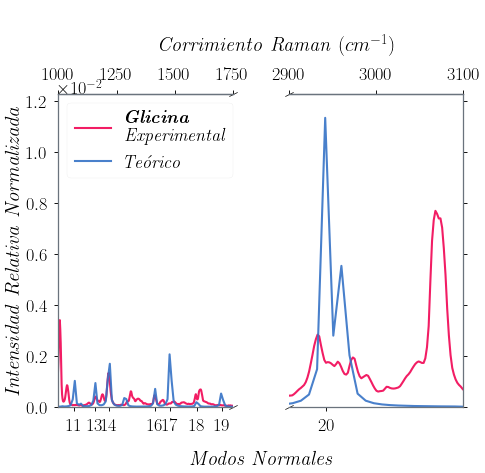

In [23]:
espectro_teo_exp(glicina_exp[1:2], glicina_teo,
                 transparencia = False, divide = True, α = 0.9,
                 f1 = 0.885, f2 = 0.928, escala = 0.0013,
                 lims1 = (1000,1750), lims2 = (2900,3100),
                 title_coords = (0.48,1.02),
                 x2label_coords = (0.34, 0.95),
                 title = r'\textbf{\textit{Glicina}}',
                 save = 'glicina.jpg',
                 modos = glicina_modes)

In [24]:
glutamina_modes = pd.DataFrame(
    [
        [22,920.86,810.36,14.0742,6.9526],
        [24,1101.17,969.03,16.7761,10.0279],
        [28,1227.46,1080.16,111.7747,6.8420],
        [31,1331.72,1171.92,8.8258,6.1577],
#         [34,1456.08,1281.35,99.9846,10.5428],
        [36,1512.87,1331.32,31.2930,10.1168],
#         [39,1625.19,1430.17,12.3650,14.5592],
        [40,1651.12,1452.98,14.7725,6.0452],
        [43,1867.51,1643.41,374.1431,5.8444],
        [45,3193.24,2916.38,7.6806,91.8246],
        [46,3214.55,2935.84,14.6777,61.9509],
#         [47,3244.92,2963.58,12.2297,74.3112],
        [48,3252.61,2970.61,18.9716,50.6122],
        [49,3285.22,3000.39,19.6749,23.2601]
    ],
    columns = ['Modes', 'Frequency','Scaled Freq','Infrared', 'Raman']
)
# glutamina_modes = glutamina_modes.set_index('Modes')
















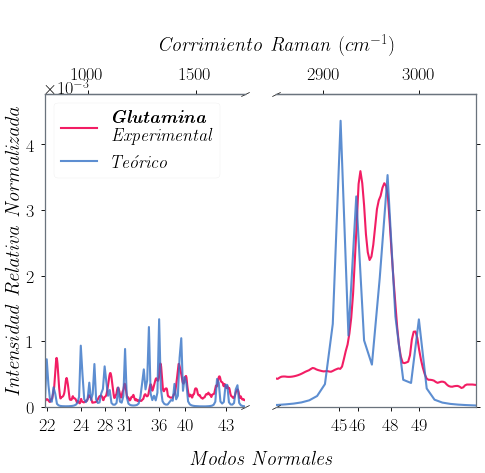

In [25]:
espectro_teo_exp(glutamina_exp[5:6], glutamina_teo,transparencia = False, divide = True, α = 0.8,
                 f1 = 0.88, f2 = 0.9133,escala = 0.00075,
                 lims1 = (800, 1730), lims2 = (2850,3060),
                 x2label_coords = (0.34, 0.95),
                 title_coords = (0.43, 1.02),
                 title = r'\textbf{\textit{Glutamina}}',
                 save = 'glutamina.jpg',
                 modos = glutamina_modes)


In [26]:
fenilalanina_modes = pd.DataFrame(
    [
#         [18,715.00,643.50,276.1482,5.5893],
        [20,830.40,747.36,38.0221,8.1343],
        [23,918.70,826.83,19.3640,6.6334],
#         [27,1113.19,1001.87,3.0190,27.5219],
        [28,1119.00,1007.10,19.9850,14.3649],
        [39,1351.00,1215.90,6.8641,10.6367],
        [43,1507.97,1357.17,12.6464,9.0757],
        [47,1651.38,1486.25,12.8192,12.2851],
#         [49,1784.28,1605.85,2.0218,10.2077],
        [50,1811.26,1630.13,4.1998,26.1948],
        [53,3216.44,2898.01,20.6658,79.4989],
        [54,3268.46,2944.88,6.7029,67.7154],
#         [57,3351.31,3019.53,0.6034,67.1839],
        [58,3362.81,3029.89,14.9806,92.6517],
        [60,3387.95,3052.54,21.9067,265.6792]
    ],
    columns = ['Modes', 'Frequency','Scaled Freq','Infrared', 'Raman']
)
# fenilalanina_modes = fenilalanina_modes.set_index('Modes')
















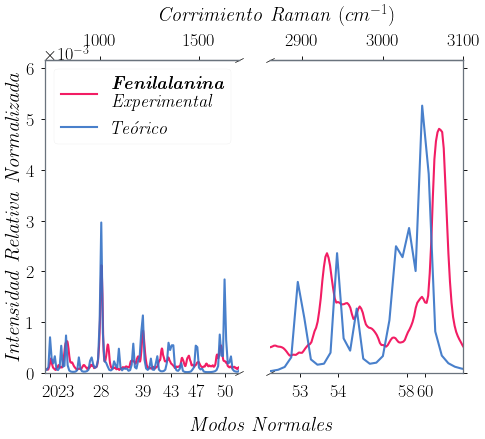

In [27]:
fenilalanina_teo=raman_feni_teo
espectro_teo_exp(fenilalanina_exp[8:9], fenilalanina_teo,
                 transparencia = False, divide = True, 
                 α = 0.9, f1 = 0.9, f2 = 0.901, escala = 0.0006,
                 lims1 = (720,1700), lims2 = (2860,3100),
                 title_coords = (0.4, 0.93),
                 x2label_coords = (0.34, 0.94),
                 title = r'\textbf{\textit{Fenilalanina}}',
                 save = 'fenilalanina.jpg',
                 modos = fenilalanina_modes
                )

In [28]:
acido_glutam_modes= pd.DataFrame(
    [
#         [19,796.31,680.84,45.7774,4.7168],
#         [20,856.58,732.37,10.5504,4.6752],
#         [21,926.85,792.45,12.6936,2.2139],
        [22,993.98,849.85,16.9381,3.0916],
#         [23,1100.37,940.82,9.5345,7.2688],
        [24,1122.85,960.03,17.5728,7.8239],
#         [25,1145.90,979.74,9.2104,7.7422],
#         [33,1457.83,1246.44,8.1071,6.8191],
        [34,1466.07,1253.49,24.0240,7.2732],
        [38,1649.75,1410.54,5.2054,11.8843],
#         [39,1663.26,1422.09,9.1421,7.9834],
#         [42,1962.48,1677.92,308.7733,19.6026],
        [43,3094.72,2834.76,41.1358,92.1650],
        [44,3223.30,2952.54,7.7241,82.5074],
#         [45,3235.77,2963.97,18.5957,53.2440],
        [46,3275.13,3000.02,8.7482,46.7599],
        [47,3306.38,3028.64,12.0276,58.3252],
    ],
    columns = ['Modes', 'Frequency','Scaled Freq','Infrared', 'Raman']
)
# acido_glutam_modes = acido_glutam_modes.set_index('Modes')













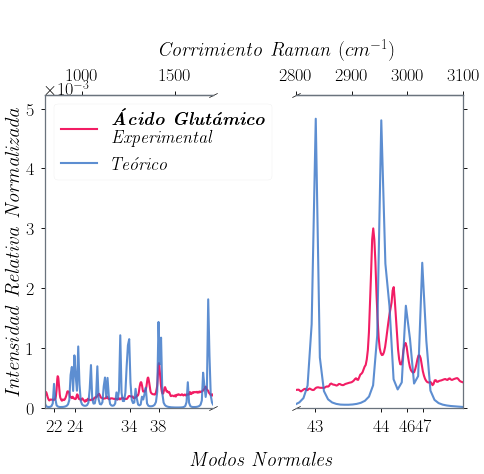

In [29]:
espectro_teo_exp(acido_glutam_exp[4:5], acido_glutam_teo, 
                 transparencia = False, divide = True,
                 α = 0.8, f1 = 0.855, f2 = 0.916, escala = 0.0008,
                 lims1 = (800,1700), lims2 = (2800,3100),
                 title_coords = (0.4, 1.02),
                 x2label_coords = (0.34, 0.94),
                 title = r'\textbf{\textit{Ácido Glutámico}}',
                save = 'acid_gluam.jpg',
                modos= acido_glutam_modes)

In [30]:
triptofano_modes = pd.DataFrame(
    [
        [26,842.66,749.97,21.8157,15.1636],
        [30,975.78,868.45,0.5941,5.6244],
        [36,1122.74,999.24,3.2330,15.9500],
#         [39,1205.95,1073.30,57.4833,10.4844],
        [43,1273.57,1133.47,2.4584,6.3044],
        [49,1429.99,1272.69,31.4963,19.6430],
        [52,1512.71,1346.31,8.4681,35.4050],
        [55,1594.37,1418.99,41.7597,32.9880],
        [59,1749.61,1557.16,15.8749,65.4907],
#         [61,1822.61,1622.12,6.2783,19.5860],
        [64,3215.48,3247.64,24.7932,90.0613],
        [65,3258.96,3291.55,6.5877,68.2680],
        [70,3385.54,3419.40,31.0371,263.4275]
    ],
    columns = ['Modes', 'Frequency','Scaled Freq','Infrared', 'Raman']
)
# triptofano_modes = triptofano_modes.set_index('Modes')

















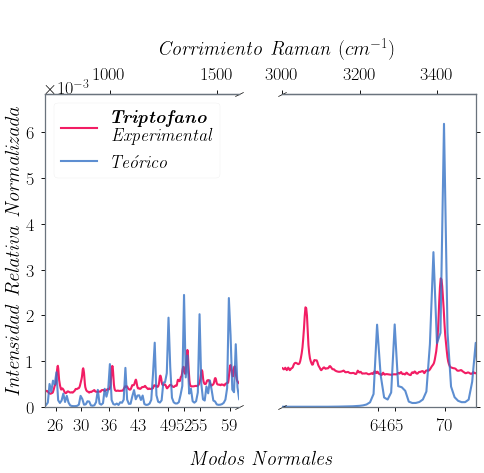

In [31]:
espectro_teo_exp([triptofano_exp[-1]], triptofano_teo, 
                 transparencia = False, divide = True,
                 α = 0.8, f1 = 0.89, f2 = 1.01, escala = 0.0004,
                 c2 = 2.5,
                 lims1 = (700,1600), lims2 = (3000,3500),
                 title_coords = (0.45,1.02),
                 x2label_coords = (0.34, 0.94),
                 title = r'\textbf{\textit{Triptofano}}',save = 'triptofano',
               modos = triptofano_modes)

## Espectros IR y Raman solo de Fenilalanina

In [32]:
#Redefino modos de Fenilalanina
# !!!!!No se consideran los factores de escalamiento anteriores
ir_fenilalanina_teo = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/FENI_RAMAN_ir.txt',
                skipinitialspace=True,
                skiprows=72,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])

ir_fenilalanina_peaks = pd.DataFrame.from_dict({
    'valores':
    pd.read_csv('espectros_simulacion/FENI_RAMAN_ir.txt',
                skipinitialspace=True,
                skiprows=6,
                nrows= 69 - 7,
                sep=' ',
                names=['x', 'y', 'dy/dx'])
}['valores'])

ir_modes = [8,18,34,52,59,63]
raman_modes = [8,28,39, 50, 53,60, 61,63]
fenilalanina_modes = pd.DataFrame(
    [
        [8,340.88,340.88,30.4867,4.1449],
        [14,652.78,652.78,183.184,0.8327],
        [18,715.00,643.50,276.1482,5.5893],
        [20,830.40,747.36,38.0221,8.1343],
        [23,918.70,826.83,19.3640,6.6334],
#         [27,1113.19,1001.87,3.0190,27.5219],
        [28,1119.00,1007.10,19.9850,14.3649],
        [34,1245.86,1245.85,241.4686,1.1837],
        [39,1351.00,1215.90,6.8641,10.6367],
        [43,1507.97,1357.17,12.6464,9.0757],
        [47,1651.38,1486.25,12.8192,12.2851],
#         [49,1784.28,1605.85,2.0218,10.2077],
        [50,1811.26,1630.13,4.1998,26.1948],
        [52,1904.23,1904.23,258.9237,3.3889],
        [53,3216.44,2898.01,20.6658,79.4989],
        [54,3268.46,2944.88,6.7029,67.7154],
#         [57,3351.31,3019.53,0.6034,67.1839],
        [58,3362.81,3029.89,14.9806,92.6517],
        [59,3373.23,3373.23,42.6584,22.8953],
        [60,3387.95,3052.54,21.9067,265.6792],
        [61,3789.94,3789.94,8.0101,110.3489],
        [62,3912.25,3912.25,15.2043,71.2431],
        [63,3983.86,3983.85,88.1906,97.4121]
],
    columns = ['Modes', 'Frequency','Scaled Freq','IR', 'Raman']
)
# fenilalanina_modes = fenilalanina_modes.set_index('Modes')

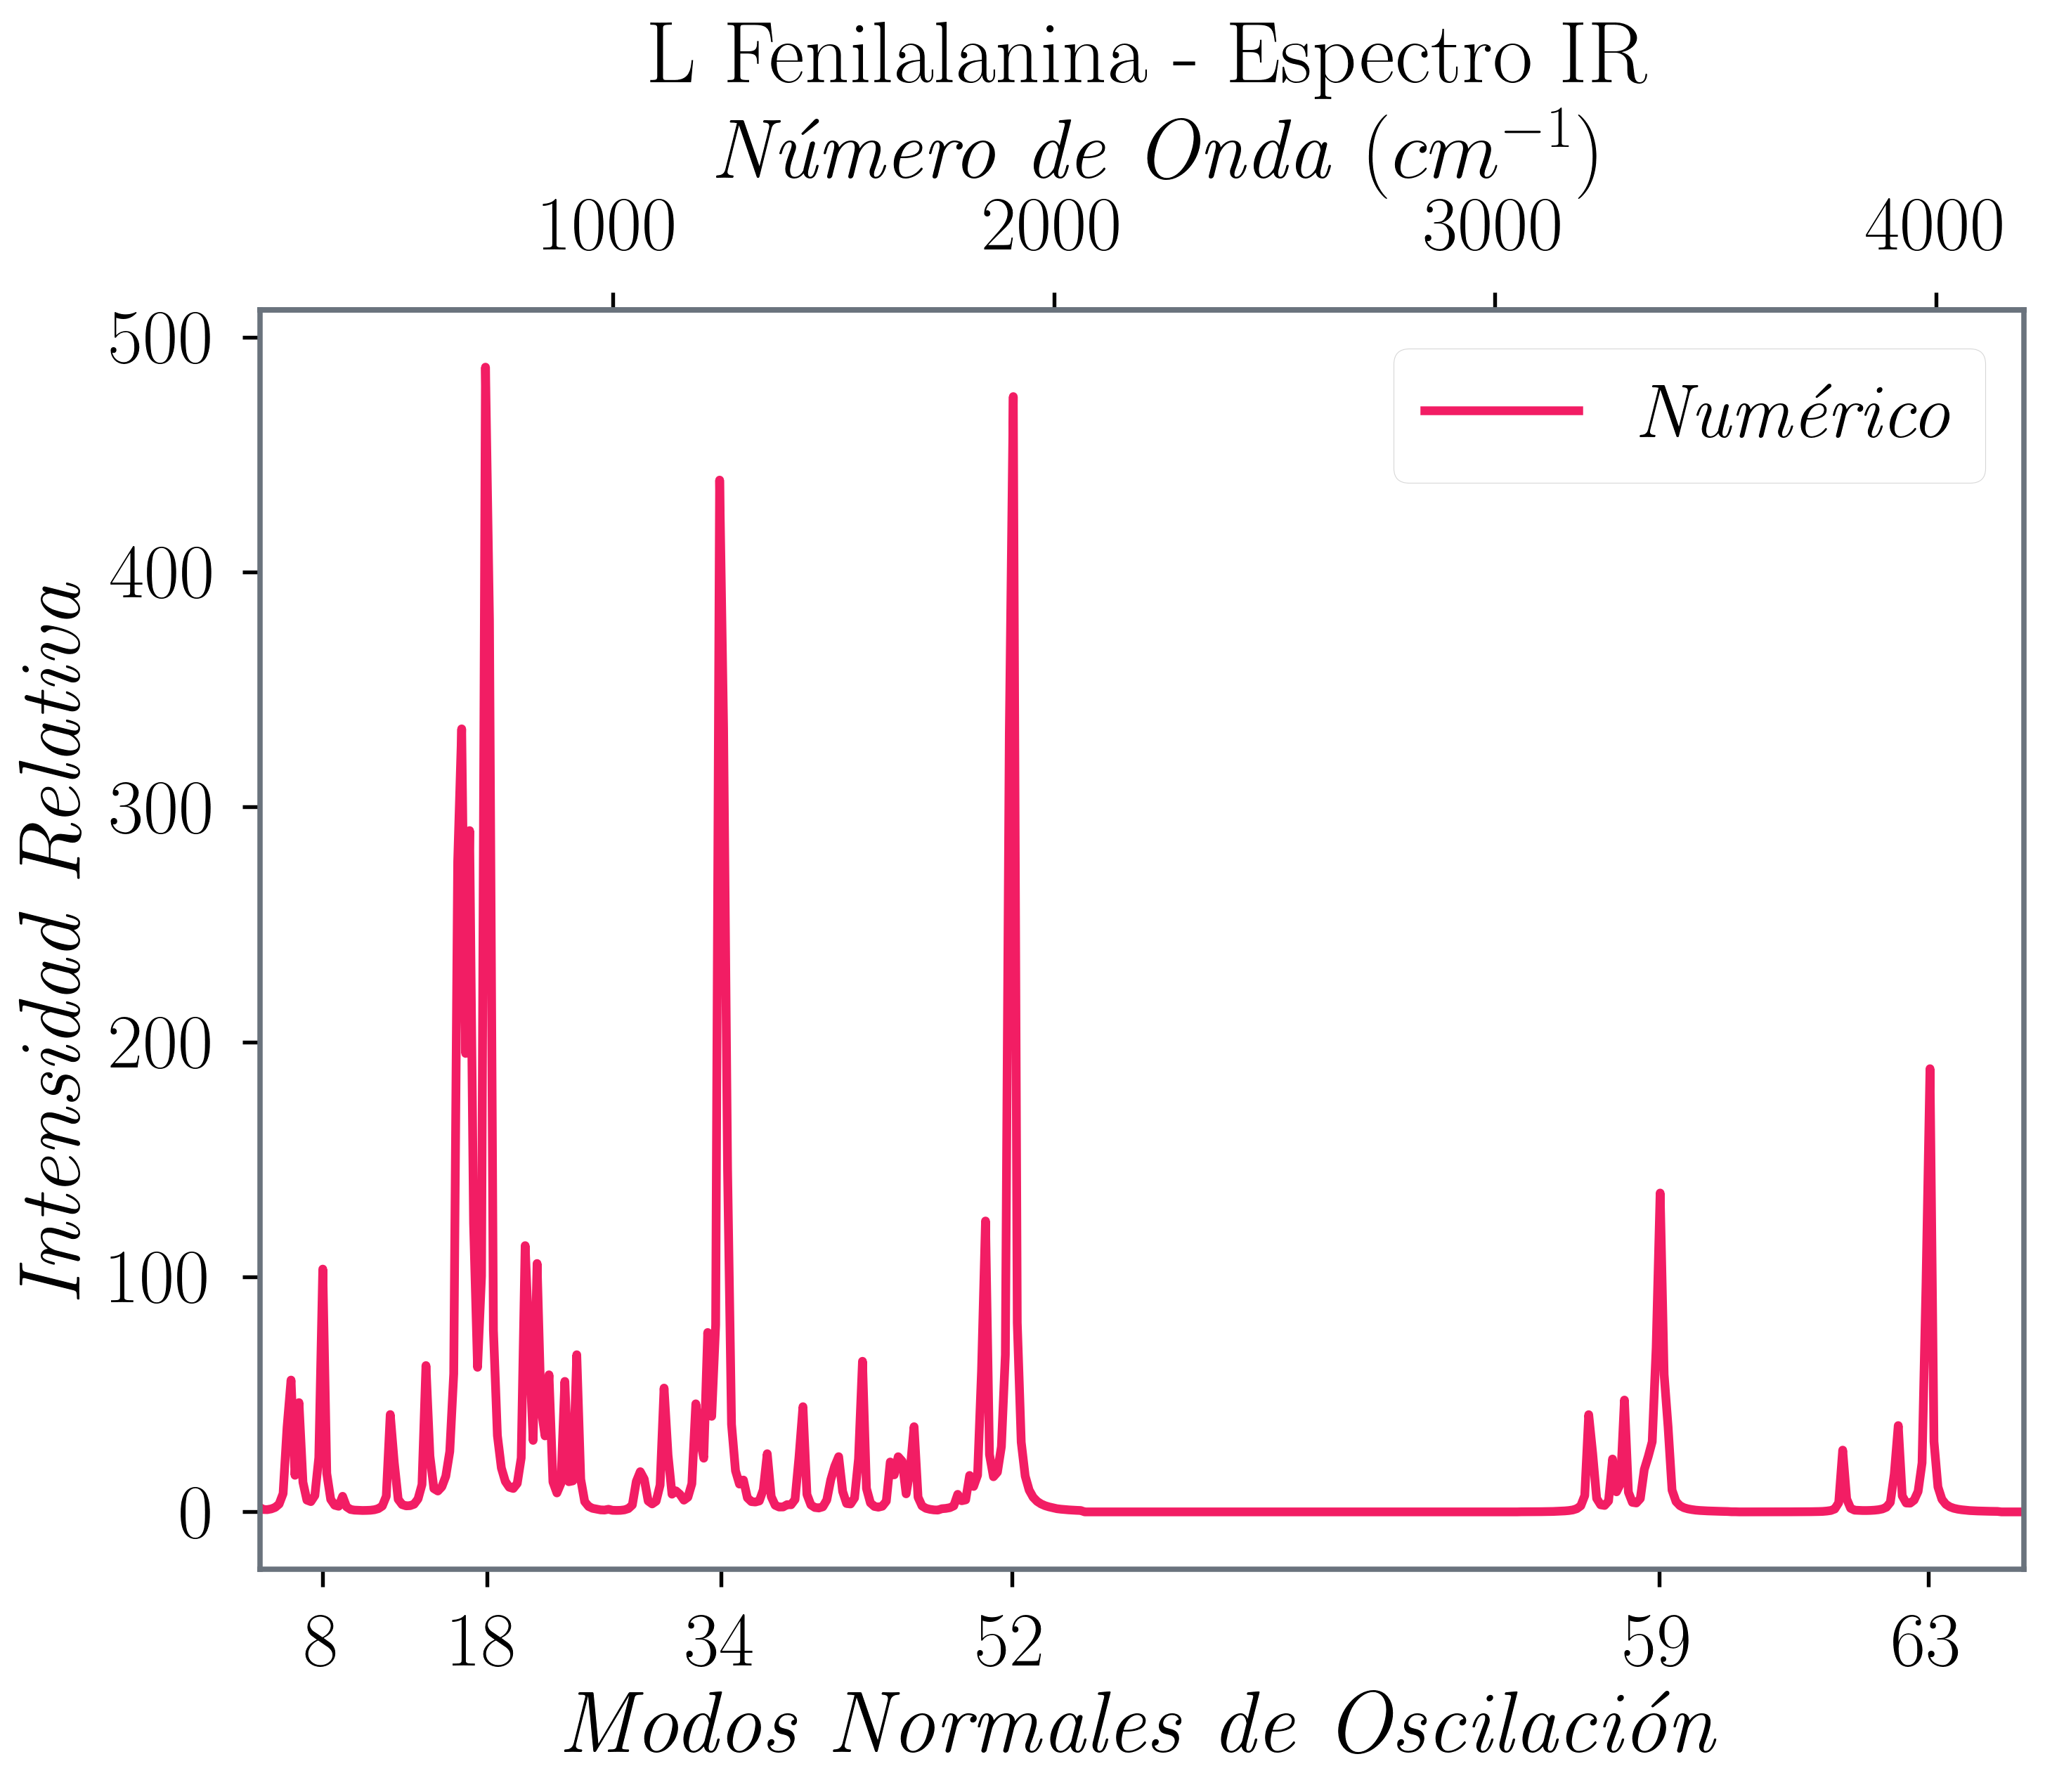

In [33]:
#Espectro IR deFenilalanina
espectro = ir_fenilalanina_teo
fig, ax = plt.subplots()
ax.plot(espectro['x'], espectro['y'], color = rosa, label = r'\textit{Numérico}')
ax.set_xlabel(r'{\textit{Modos Normales de Oscilación}')
ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
ax.set_title(r'L Fenilalanina - Espectro IR', color = 'w')
ax.legend()
ax.set_xticks(fenilalanina_modes[
    fenilalanina_modes['Modes'].isin(ir_modes)]['Frequency'])
ax.set_xticklabels(fenilalanina_modes[
        fenilalanina_modes['Modes'].isin(ir_modes)]['Modes'])

secax = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secax.set_xlabel('asdf', color = 'w')
fig.text(0.36, 0.88, r'\textit{Número de Onda} ($cm^{-1}$)', 
         fontsize = fontsize - 1) 
fig.text(0.33, 0.93, r'L Fenilalanina - Espectro IR') 
ax.set_xlim(200, 4200)
fig.tight_layout()
plt.savefig('ir_fenilalanina_sim.jpg')

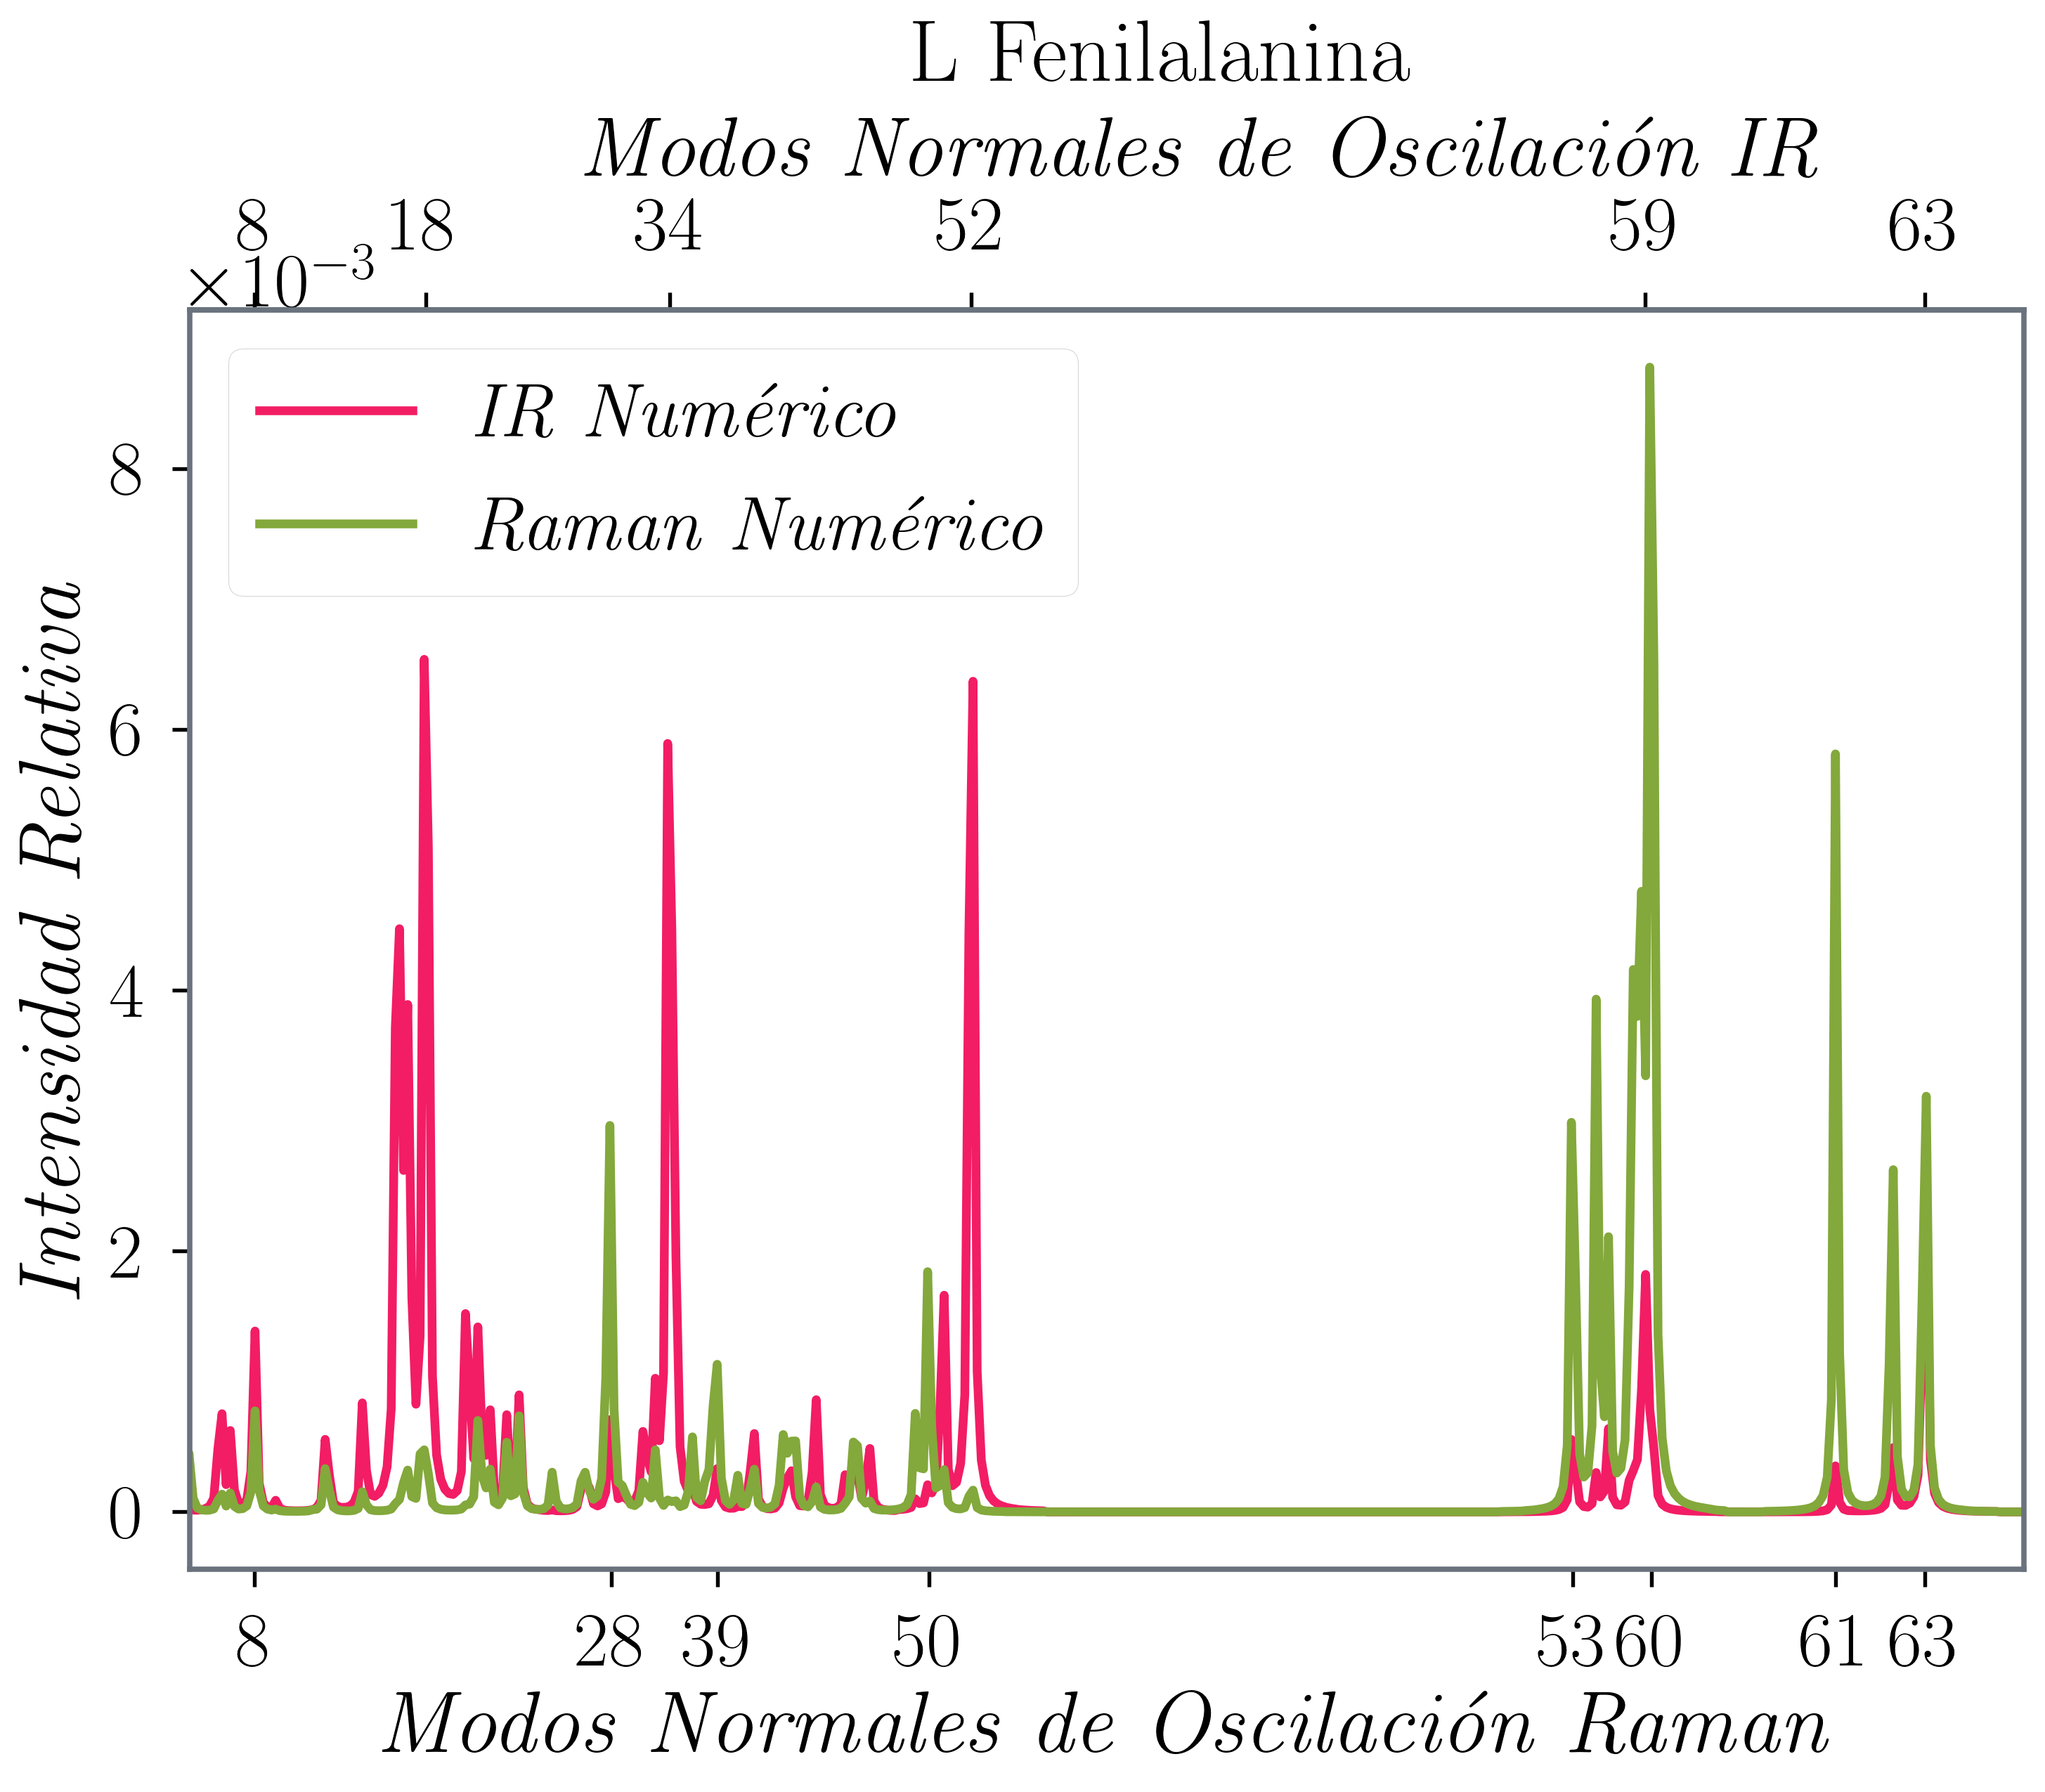

In [34]:
#Plot IR y Raman juntos
fig, ax = plt.subplots()

c_norm_ir = 1/integra(ir_fenilalanina_teo)
c_norm_raman = 1/integra(raman_feni_teo)

ax.plot(ir_fenilalanina_teo['x'], c_norm_ir*ir_fenilalanina_teo['y'], color = rosa, label = r'\textit{IR Numérico}')
ax.plot(raman_feni_teo['x'], c_norm_raman*raman_feni_teo['y'], color = 'C1', label = r'\textit{Raman Numérico}')

ax.set_xlabel(r'{\textit{Modos Normales de Oscilación Raman}')
ax.set_ylabel(r'{\textit{Intensidad Relativa}}')
ax.set_title(r'L Fenilalanina - Espectro IR', color = 'w')
ax.legend()

ax.set_xticks(fenilalanina_modes[fenilalanina_modes['Modes'].isin(raman_modes)]['Frequency'])
ax.set_xticklabels(fenilalanina_modes[
        fenilalanina_modes['Modes'].isin(raman_modes)]['Modes'])

secax = ax.secondary_xaxis('top', functions=(lambda x: x, lambda x: x))
secax.set_xlabel('asdf', color = 'w')
secax.set_xticks(fenilalanina_modes[fenilalanina_modes['Modes'].isin(ir_modes)]['Frequency'])
secax.set_xticklabels(fenilalanina_modes[
        fenilalanina_modes['Modes'].isin(ir_modes)]['Modes'])

fig.text(0.3, 0.88, r'\textit{Modos Normales de Oscilación IR}', 
         fontsize = fontsize - 1) 
fig.text(0.45, 0.93, r'L Fenilalanina') 

ax.ticklabel_format(axis='y',style='sci', scilimits=(0,0))
ax.set_xlim(200, 4200)
fig.tight_layout()
plt.savefig('ir_and_raman_fenilalanina_sim.jpg')